<a href="https://colab.research.google.com/github/osmarbraz/exemplos_BERT/blob/main/ExemplosWordEmbeddingContextualBERT_en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exemplo de Word Embeddings(en) Contextual usando BERT Transformers by HuggingFace

## **A execução pode ser feita através do menu Ambiente de Execução opção Executar tudo.**

Exemplos de uso de **Word Embeddings Contextuais** para **desambiguação** de palavras em frases. No final do notebook  estão os exemplos com as palavras:

*   bank
*   letter
*   bass
*   sign

**Link biblioteca Huggingface:**
https://github.com/huggingface/transformers


**Artigo original BERT Jacob Devlin:**
https://arxiv.org/pdf/1506.06724.pdf

## 0 - Preparação do ambiente
Preparação do ambiente para execução do exemplo.

###Tratamento de logs

Método para tratamento dos logs.

In [1]:
#biblioteca de logging
import logging

#formatando a mensagem de logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

### Identificando o ambiente Colab

Cria uma variável para identificar que o notebook está sendo executado no Google Colaboratory.

In [2]:
#se estiver executando no Google Colaboratory
import sys

#retorna true ou false se estiver no Google Colaboratory
IN_COLAB = 'google.colab' in sys.modules

## 1 - Instalação BERT da Hugging Face

Instala a interface pytorch para o BERT by Hugging Face. 

In [3]:
# Instala a última versão da biblioteca
#!pip install transformers

# Instala uma versão específica da biblioteca
!pip install -U transformers==4.5.1

     |████████████████████████████████| 2.1MB 8.3MB/s 
     |████████████████████████████████| 901kB 41.5MB/s 
     |████████████████████████████████| 3.3MB 43.5MB/s 


## 2 - Download do arquivo do PyTorch Checkpoint

Lista de modelos da comunidade:
* https://huggingface.co/models

Inglês:  
* **'bert-base-uncased'**
* **'bert-large-uncased'**

In [4]:
# Importando as bibliotecas
import os

# Variável para setar o arquivo
URL_MODELO = None

# Comente uma das urls para carregar modelos de tamanhos diferentes(base/large)
# URL_MODELO do arquivo do modelo tensorflow
# arquivo menor(base) 389 Mbytes
#URL_MODELO = "https://storage.googleapis.com/bert_models/2020_02_20/uncased_L-12_H-768_A-12.zip"

# arquivo grande(large) 1.2 Gbytes
#URL_MODELO = "https://storage.googleapis.com/bert_models/2019_05_30/wwm_uncased_L-24_H-1024_A-16.zip"

# Se a variável foi setada
if URL_MODELO:

    # Diretório descompactação
    DIRETORIO_MODELO = '/content/modelo'

    # Recupera o nome do arquivo do modelo da url
    arquivo = URL_MODELO.split("/")[-1]

    # Nome do arquivo do vocabulário
    arquivo_vocab = "vocab.txt"

    # Caminho do arquivo na url
    caminho = URL_MODELO[0:len(URL_MODELO)-len(arquivo)]

    # Verifica se a pasta de descompactação existe no pasta corrente
    if not os.path.exists(DIRETORIO_MODELO):
   
        # Baixa o arquivo do modelo
        !wget $URL_MODELO
    
        # Descompacta o arquivo na pasta de descompactação
        !unzip -o $arquivo -d $DIRETORIO_MODELO

        # Baixa o arquivo do vocabulário. Na versão em inglês está dentro do arquivo do modelo.
        # O vocabulário não está no arquivo compactado acima, mesma url mas arquivo diferente
        #URL_MODELO_VOCAB = caminho + arquivo_vocab
        #!wget $URL_MODELO_VOCAB
    
        # Coloca o arquivo do vocabulário no diretório de descompactação
        !mv $arquivo_vocab $DIRETORIO_MODELO
            
        # Move o arquivo para pasta de descompactação
        !mv $arquivo $DIRETORIO_MODELO

        print('Pasta do ' + DIRETORIO_MODELO + ' pronta!')
    else:
      print('Pasta do ' + DIRETORIO_MODELO + ' já existe!')

    # Lista a pasta corrente
    !ls -la $DIRETORIO_MODELO
else:
    print('Variável URL_MODELO não setada!')

Variável URL_MODELO não setada!


## 3 - Carregando o Tokenizador BERT

O tokenizador utiliza WordPiece, veja em [artigo original](https://arxiv.org/pdf/1609.08144.pdf).

Carregando o tokenizador da pasta '/content/modelo/' do diretório padrão se variável `URL_MODELO` setada.

**Caso contrário carrega da comunidade**

Por default(`do_lower_case=True`) todas as letras são colocadas para minúsculas. Para ignorar a conversão para minúsculo use o parâmetro `do_lower_case=False`. Esta opção também considera as letras acentuadas(ãçéí...), que são necessárias a língua portuguesa.

O parâmetro `do_lower_case` interfere na quantidade tokens a ser gerado apartir de um texto. Quando igual a `False` reduz a quantidade de tokens gerados.

In [5]:
# Importando as bibliotecas do tokenizador
from transformers import BertTokenizer

# Se a variável URL_MODELO foi setada
if URL_MODELO:
    # Carregando o Tokenizador
    print('Carrgando o tokenizador BERT do diretório ' + DIRETORIO_MODELO + '...')

    tokenizer = BertTokenizer.from_pretrained(DIRETORIO_MODELO)
    
else:
    # Carregando o Tokenizador da comunidade
    print('Carregando o tokenizador da comunidade...')

    tokenizer = BertTokenizer.from_pretrained('bert-large-uncased')

Carregando o tokenizador da comunidade...


2021-05-06 14:57:15,993 : INFO : Lock 140101112376208 acquired on /root/.cache/huggingface/transformers/e12f02d630da91a0982ce6db1ad595231d155a2b725ab106971898276d842ecc.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99.lock


2021-05-06 14:57:16,463 : INFO : Lock 140101112376208 released on /root/.cache/huggingface/transformers/e12f02d630da91a0982ce6db1ad595231d155a2b725ab106971898276d842ecc.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99.lock


2021-05-06 14:57:17,068 : INFO : Lock 140101125210832 acquired on /root/.cache/huggingface/transformers/300ecd79785b4602752c0085f8a89c3f0232ef367eda291c79a5600f3778b677.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a1a15e79.lock


2021-05-06 14:57:17,313 : INFO : Lock 140101125210832 released on /root/.cache/huggingface/transformers/300ecd79785b4602752c0085f8a89c3f0232ef367eda291c79a5600f3778b677.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a1a15e79.lock


2021-05-06 14:57:17,516 : INFO : Lock 140101133108688 acquired on /root/.cache/huggingface/transformers/475d46024228961ca8770cead39e1079f135fd2441d14cf216727ffac8d41d78.7f2721073f19841be16f41b0a70b600ca6b880c8f3df6f3535cbc704371bdfa4.lock


2021-05-06 14:57:18,031 : INFO : Lock 140101133108688 released on /root/.cache/huggingface/transformers/475d46024228961ca8770cead39e1079f135fd2441d14cf216727ffac8d41d78.7f2721073f19841be16f41b0a70b600ca6b880c8f3df6f3535cbc704371bdfa4.lock


## 4 - Carregando o Modelo BERT(BertModel)

Se a variável `URL_MODELO` estiver setada carrega o modelo do diretório `content/modelo`.

Caso contrário carrega da comunidade.

Carregando o modelo da pasta '/content/modelo/' do diretório padrão.

A implementação do huggingface pytorch inclui um conjunto de interfaces projetadas para uma variedade de tarefas de PNL. Embora essas interfaces sejam todas construídas sobre um modelo treinado de BERT, cada uma possui diferentes camadas superiores e tipos de saída projetados para acomodar suas tarefas específicas de PNL.

A documentação para estas pode ser encontrada em [aqui](https://huggingface.co/transformers/v2.2.0/model_doc/bert.html).

Por default o modelo está em modo avaliação ou seja `model.eval()`.

-----------------------

Durante a avaliação do modelo, este retorna um número de diferentes objetos com base em como é configurado na chamada do método `from_pretrained`. 

Quando definimos `output_hidden_states = True` na chamada do método `from_pretrained`, retorno do modelo possui no terceiro item os estados ocultos(**hidden_states**) de todas as camadas.  Veja a documentação para mais detalhes: https://huggingface.co/transformers/model_doc/bert.html#bertmodel

Quando **`output_hidden_states = True`** model retorna:
- outputs[0] = last_hidden_state;
- outputs[1] = pooler_output; 
- outputs[2] = hidden_states.

Quando **`output_hidden_states = False`** ou não especificado model retorna:
- outputs[0] = last_hidden_state;
- outputs[1] = pooler_output.


**ATENÇÃO**: O parâmetro ´**output_hidden_states = True**´ habilita gerar as camadas ocultas do modelo. Caso contrário somente a última camada é mantida. Este parâmetro otimiza a memória mas não os resultados.


In [6]:
# Importando as bibliotecas do Modelo
from transformers import BertModel

# Se a variável URL_MODELO1 foi setada
if URL_MODELO:
    # Carregando o Tokenizador
    print('Carregando o modelo BERT do diretório ' + DIRETORIO_MODELO + '...')    
    model = BertModel.from_pretrained(DIRETORIO_MODELO, 
                                      output_hidden_states = True)
else:
    # Carregando o Tokenizador da comunidade
    print('Carregando o modelo BERT da comunidade ...')

    #model = BertModel.from_pretrained('bert-large-uncased')  
    model = BertModel.from_pretrained('bert-large-uncased', 
                                       output_hidden_states = True)

2021-05-06 14:57:20,030 : INFO : Lock 140101105549200 acquired on /root/.cache/huggingface/transformers/1cf090f220f9674b67b3434decfe4d40a6532d7849653eac435ff94d31a4904c.1d03e5e4fa2db2532c517b2cd98290d8444b237619bd3d2039850a6d5e86473d.lock


Carregando o modelo BERT da comunidade ...


2021-05-06 14:57:20,435 : INFO : Lock 140101105549200 released on /root/.cache/huggingface/transformers/1cf090f220f9674b67b3434decfe4d40a6532d7849653eac435ff94d31a4904c.1d03e5e4fa2db2532c517b2cd98290d8444b237619bd3d2039850a6d5e86473d.lock


2021-05-06 14:57:20,653 : INFO : Lock 140101105172688 acquired on /root/.cache/huggingface/transformers/1d959166dd7e047e57ea1b2d9b7b9669938a7e90c5e37a03961ad9f15eaea17f.fea64cd906e3766b04c92397f9ad3ff45271749cbe49829a079dd84e34c1697d.lock


2021-05-06 14:57:48,894 : INFO : Lock 140101105172688 released on /root/.cache/huggingface/transformers/1d959166dd7e047e57ea1b2d9b7b9669938a7e90c5e37a03961ad9f15eaea17f.fea64cd906e3766b04c92397f9ad3ff45271749cbe49829a079dd84e34c1697d.lock


## 5 - Funções auxiliares

### getEmbeddingsCamadas

Funções que recuperam os embeddings das camadas:
- Primeira camada;
- Penúltima camada;
- Ùltima camada;
- Soma das 4 últimas camadas;
- Concatenação das 4 últimas camadas;
- Soma de todas as camadas.

In [7]:
def getEmbeddingPrimeiraCamada(output):
  # outputs[0] = last_hidden_state, outputs[1] = pooler_output, outputs[2] = hidden_states
  # hidden_states é uma lista python, e cada elemento um tensor pytorch no formado <lote> x <qtde_tokens> x <768 ou 1024>.
      
  # Retorna todas a primeira(-1) camada
  # Entrada: List das camadas(13 ou 25) (<1(lote)> x <qtde_tokens> <768 ou 1024>)  
  resultado = output[2][0]
  # Saída: (<1(lote)> x <qtde_tokens> <768 ou 1024>)  
  
  return resultado

def getEmbeddingPenultimaCamada(output):
  # outputs[0] = last_hidden_state, outputs[1] = pooler_output, outputs[2] = hidden_states
  # hidden_states é uma lista python, e cada elemento um tensor pytorch no formado <lote> x <qtde_tokens> x <768 ou 1024>.
      
  # Retorna todas a primeira(-1) camada
  # Entrada: List das camadas(13 ou 25) (<1(lote)> x <qtde_tokens> <768 ou 1024>)  
  resultado = output[2][-2]
  # Saída: (<1(lote)> x <qtde_tokens> <768 ou 1024>)  
  
  return resultado

def getEmbeddingUltimaCamada(output):
  # outputs[0] = last_hidden_state, outputs[1] = pooler_output, outputs[2] = hidden_states
  # hidden_states é uma lista python, e cada elemento um tensor pytorch no formado <lote> x <qtde_tokens> x <768 ou 1024>.
     
  # Retorna todas a primeira(-1) camada
  # Entrada: List das camadas(13 ou 25) (<1(lote)> x <qtde_tokens> <768 ou 1024>)  
  resultado = output[2][-1]
  # Saída: (<1(lote)> x <qtde_tokens> <768 ou 1024>)  
  
  return resultado    

def getEmbeddingSoma4UltimasCamadas(output):
  # outputs[0] = last_hidden_state, outputs[1] = pooler_output, outputs[2] = hidden_states
  # hidden_states é uma lista python, e cada elemento um tensor pytorch no formado <lote> x <qtde_tokens> x <768 ou 1024>.
      
  # Retorna todas a primeira(-1) camada
  # Entrada: List das camadas(13 ou 25) (<1(lote)> x <qtde_tokens> <768 ou 1024>)  
  embeddingCamadas = output[2][-4:]
  # Saída: List das camadas(4) (<1(lote)> x <qtde_tokens> <768 ou 1024>)  

  # Usa o método `stack` para criar uma nova dimensão no tensor 
  # com a concateção dos tensores dos embeddings.        
  #Entrada: List das camadas(4) (<1(lote)> x <qtde_tokens> <768 ou 1024>)  
  resultadoStack = torch.stack(embeddingCamadas, dim=0)
  # Saída: <4> x <1(lote)> x <qtde_tokens> x <768 ou 1024>
  
  # Realiza a soma dos embeddings de todos os tokens para as camadas
  # Entrada: <4> x <1(lote)> x <qtde_tokens> x <768 ou 1024>
  resultado = torch.sum(resultadoStack, dim=0)
  # Saida: <1(lote)> x <qtde_tokens> x <768 ou 1024>
  
  return resultado

def getEmbeddingConcat4UltimasCamadas(output):  
  # outputs[0] = last_hidden_state, outputs[1] = pooler_output, outputs[2] = hidden_states
  # hidden_states é uma lista python, e cada elemento um tensor pytorch no formado <lote> x <qtde_tokens> x <768 ou 1024>.
      
  # Cria uma lista com os tensores a serem concatenados
  # Entrada: List das camadas(13 ou 25) (<1(lote)> x <qtde_tokens> <768 ou 1024>)  
  # Lista com os tensores a serem concatenados
  listaConcat = []
  # Percorre os 4 últimos
  for i in [-1,-2,-3,-4]:
      # Concatena da lista
      listaConcat.append(output[2][i])
  # Saída: Entrada: List das camadas(4) (<1(lote)> x <qtde_tokens> <768 ou 1024>)  
  
  # Realiza a concatenação dos embeddings de todos as camadas
  # Saída: Entrada: List das camadas(4) (<1(lote)> x <qtde_tokens> <768 ou 1024>)  
  resultado = torch.cat(listaConcat, dim=-1)
  # Saída: Entrada: (<1(lote)> x <qtde_tokens> <3072 ou 4096>)  
    
  return resultado   

def getEmbeddingSomaTodasAsCamada(output):
  # outputs[0] = last_hidden_state, outputs[1] = pooler_output, outputs[2] = hidden_states
  # hidden_states é uma lista python, e cada elemento um tensor pytorch no formado <lote> x <qtde_tokens> x <768 ou 1024>.
   
  # Retorna todas as camadas descontando a primeira(0)
  # Entrada: List das camadas(13 ou 25) (<1(lote)> x <qtde_tokens> <768 ou 1024>)  
  embeddingCamadas = output[2][1:]
  # Saída: List das camadas(12 ou 24) (<1(lote)> x <qtde_tokens> <768 ou 1024>)  

  # Usa o método `stack` para criar uma nova dimensão no tensor 
  # com a concateção dos tensores dos embeddings.        
  #Entrada: List das camadas(12 ou 24) (<1(lote)> x <qtde_tokens> <768 ou 1024>)  
  resultadoStack = torch.stack(embeddingCamadas, dim=0)
  # Saída: <12 ou 24> x <1(lote)> x <qtde_tokens> x <768 ou 1024>
  
  # Realiza a soma dos embeddings de todos os tokens para as camadas
  # Entrada: <12 ou 24> x <1(lote)> x <qtde_tokens> x <768 ou 1024>
  resultado = torch.sum(resultadoStack, dim=0)
  # Saida: <1(lote)> x <qtde_tokens> x <768 ou 1024>
  
  return resultado

### Imports

In [8]:
# Import das bibliotecas
import numpy as np
import torch

import matplotlib.pyplot as plt
%matplotlib inline

### getEmbeddingsVisual

Função para gerar as coordenadas de plotagem a partir das sentenças de embeddings.

Existe uma função para os tipos de camadas utilizadas:
- Ùltima camada;
- Soma das 4 últimas camadas;
- Concatenação das 4 últimas camadas;
- Soma de todas as camadas.

In [9]:
def getEmbeddingsVisualUltimaCamada(texto, modelo, tokenizador):
    
    # Adiciona os tokens especiais
    texto_marcado = "[CLS] " + texto + " [SEP]"

    # Divide a sentença em tokens
    texto_tokenizado = tokenizador.tokenize(texto_marcado)

    # Mapeia as strings dos tokens em seus índices do vocabuário    
    tokens_indexados = tokenizador.convert_tokens_to_ids(texto_tokenizado)
    
    # Marca cada um dos tokens como pertencentes à frase "1".
    mascara_atencao = [1] * len(texto_tokenizado)

    # Converte a entrada em tensores
    tokens_tensores = torch.as_tensor([tokens_indexados])
    mascara_atencao_tensores = torch.as_tensor([mascara_atencao])
    
    # Prediz os atributos dos estados ocultos para cada camada
    with torch.no_grad():        
        # Retorno de model quando ´output_hidden_states=True´ é setado:  
        #outputs[0] = last_hidden_state, outputs[1] = pooler_output, outputs[2] = hidden_states
        outputs = modelo(tokens_tensores, mascara_atencao_tensores)

    # Camada embedding    
    camada = getEmbeddingUltimaCamada(outputs)

    # Remove a dimensão 1, o lote "batches".
    token_embeddings = torch.squeeze(camada, dim=0)

    # Recupera os embeddings dos tokens como um vetor
    embeddings = token_embeddings.numpy()

    # Converte para um array
    W = np.array(embeddings)
    # Transforma em um array
    B = np.array([embeddings[0], embeddings[-1]])
    # Invertee B.T
    Bi = np.linalg.pinv(B.T)

    #Projeta a palavra no espaço
    Wp = np.matmul(Bi,W.T)

    return Wp, texto_tokenizado

In [10]:
def getEmbeddingsVisualSoma4UltimasCamadas(texto, modelo, tokenizador):
    
    # Adiciona os tokens especiais
    texto_marcado = "[CLS] " + texto + " [SEP]"

    # Divide a sentença em tokens
    texto_tokenizado = tokenizador.tokenize(texto_marcado)

    # Mapeia as strings dos tokens em seus índices do vocabuário    
    tokens_indexados = tokenizador.convert_tokens_to_ids(texto_tokenizado)
    
    # Marca cada um dos tokens como pertencentes à frase "1".
    mascara_atencao = [1] * len(texto_tokenizado)

    # Converte a entrada em tensores
    tokens_tensores = torch.as_tensor([tokens_indexados])
    mascara_atencao_tensores = torch.as_tensor([mascara_atencao])
    
    # Prediz os atributos dos estados ocultos para cada camada
    with torch.no_grad():        
        # Retorno de model quando ´output_hidden_states=True´ é setado:  
        #outputs[0] = last_hidden_state, outputs[1] = pooler_output, outputs[2] = hidden_states
        outputs = modelo(tokens_tensores, mascara_atencao_tensores)

    # Camada embedding    
    camada = getEmbeddingSoma4UltimasCamadas(outputs)

    # Remove a dimensão 1, o lote "batches".
    token_embeddings = torch.squeeze(camada, dim=0)

    # Recupera os embeddings dos tokens como um vetor
    embeddings = token_embeddings.numpy()

    # Converte para um array
    W = np.array(embeddings)
    # Transforma em um array
    B = np.array([embeddings[0], embeddings[-1]])
    # Invertee B.T
    Bi = np.linalg.pinv(B.T)

    #Projeta a palavra no espaço
    Wp = np.matmul(Bi,W.T)

    return Wp, texto_tokenizado

In [11]:
def getEmbeddingsVisualConcat4UltimasCamadas(texto, modelo, tokenizador):
    
    # Adiciona os tokens especiais
    texto_marcado = "[CLS] " + texto + " [SEP]"

    # Divide a sentença em tokens
    texto_tokenizado = tokenizador.tokenize(texto_marcado)

    # Mapeia as strings dos tokens em seus índices do vocabuário    
    tokens_indexados = tokenizador.convert_tokens_to_ids(texto_tokenizado)
    
    # Marca cada um dos tokens como pertencentes à frase "1".
    mascara_atencao = [1] * len(texto_tokenizado)

    # Converte a entrada em tensores
    tokens_tensores = torch.as_tensor([tokens_indexados])
    mascara_atencao_tensores = torch.as_tensor([mascara_atencao])
    
    # Prediz os atributos dos estados ocultos para cada camada
    with torch.no_grad():        
        # Retorno de model quando ´output_hidden_states=True´ é setado:  
        #outputs[0] = last_hidden_state, outputs[1] = pooler_output, outputs[2] = hidden_states
        outputs = modelo(tokens_tensores, mascara_atencao_tensores)

    # Camada embedding    
    camada = getEmbeddingConcat4UltimasCamadas(outputs)

    # Remove a dimensão 1, o lote "batches".
    token_embeddings = torch.squeeze(camada, dim=0)

    # Recupera os embeddings dos tokens como um vetor
    embeddings = token_embeddings.numpy()

    # Converte para um array
    W = np.array(embeddings)
    # Transforma em um array
    B = np.array([embeddings[0], embeddings[-1]])
    # Invertee B.T
    Bi = np.linalg.pinv(B.T)

    #Projeta a palavra no espaço
    Wp = np.matmul(Bi,W.T)

    return Wp, texto_tokenizado

In [12]:
def getEmbeddingsVisualSomaTodasAsCamadas(texto, modelo, tokenizador):
    
    # Adiciona os tokens especiais
    texto_marcado = "[CLS] " + texto + " [SEP]"

    # Divide a sentença em tokens
    texto_tokenizado = tokenizador.tokenize(texto_marcado)

    # Mapeia as strings dos tokens em seus índices do vocabuário    
    tokens_indexados = tokenizador.convert_tokens_to_ids(texto_tokenizado)
    
    # Marca cada um dos tokens como pertencentes à frase "1".
    mascara_atencao = [1] * len(texto_tokenizado)

    # Converte a entrada em tensores
    tokens_tensores = torch.as_tensor([tokens_indexados])
    mascara_atencao_tensores = torch.as_tensor([mascara_atencao])
    
    # Prediz os atributos dos estados ocultos para cada camada
    with torch.no_grad():        
        # Retorno de model quando ´output_hidden_states=True´ é setado:  
        #outputs[0] = last_hidden_state, outputs[1] = pooler_output, outputs[2] = hidden_states
        outputs = modelo(tokens_tensores, mascara_atencao_tensores)

    # Camada embedding    
    camada = getEmbeddingSomaTodasAsCamada(outputs)

    # Remove a dimensão 1, o lote "batches".
    token_embeddings = torch.squeeze(camada, dim=0)

    # Recupera os embeddings dos tokens como um vetor
    embeddings = token_embeddings.numpy()

    # Converte para um array
    W = np.array(embeddings)
    # Transforma em um array
    B = np.array([embeddings[0], embeddings[-1]])
    # Invertee B.T
    Bi = np.linalg.pinv(B.T)

    #Projeta a palavra no espaço
    Wp = np.matmul(Bi,W.T)

    return Wp, texto_tokenizado

## 6 - Exemplo palavra "bank"

O exemplo com a palavra banco foi realizado utilizando a última camada, soma das 4 últimas, concatenação das 4 últimas camadas e a soma de todas as camadas.

### 6.1 Com a última camada

#### Inicialização

In [13]:
# Define um sentença de exemplo com diversos significados( da palavra  "bank"
textopt_br = "Depois de roubar o cofre do banco,"\
        " o ladrão de banco foi visto " \
        "sentado no banco da praça central."

texto  = "After stealing money from the bank vault, "\
        "the bank robber was seen " \
        "fishing on the Amazonas river bank."

# Adiciona os tokens especiais
texto_marcado = "[CLS] " + texto + " [SEP]"

# Divide a sentença em tokens
texto_tokenizado = tokenizer.tokenize(texto_marcado)

# Mapeia os tokens em seus índices do vocabulário
tokens_indexados = tokenizer.convert_tokens_to_ids(texto_tokenizado)

# Mostra os tokens com seus índices
i = 0
for tup in zip(texto_tokenizado, tokens_indexados):
    print('{:>3} {:<12} {:>6,}'.format(i, tup[0], tup[1]))
    i= i + 1

  0 [CLS]           101
  1 after         2,044
  2 stealing     11,065
  3 money         2,769
  4 from          2,013
  5 the           1,996
  6 bank          2,924
  7 vault        11,632
  8 ,             1,010
  9 the           1,996
 10 bank          2,924
 11 robber       27,307
 12 was           2,001
 13 seen          2,464
 14 fishing       5,645
 15 on            2,006
 16 the           1,996
 17 amazon        9,733
 18 ##as          3,022
 19 river         2,314
 20 bank          2,924
 21 .             1,012
 22 [SEP]           102


O BERT é treinado e espera pares de frases, usando 1s e 0s para distinguir entre as duas frases. Ou seja, para cada token em "texto_tokenizado", devemos especificar a qual frase pertence: sentença 0 (uma série de 0s) ou sentença 1 (uma série de 1s). Para nossos propósitos, as entradas de sentença única requerem apenas uma série de 1s; portanto, criaremos um vetor de 1s para cada token em nossa frase de entrada.

Se você deseja processar duas frases, atribua cada palavra na primeira frase mais o token '[SEP]' a 0 e todos os tokens da segunda frase a 1.

In [14]:
# Marca cada um dos tokens como pertencentes à frase "1", pois só iremos analisar uma.
mascara_atencao = [1] * len(texto_tokenizado)

print (mascara_atencao)
print (len(mascara_atencao))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
23


Converte 'tokens_indexados' e 'semegmentos_ids' em  listas em tensores.

In [15]:
# Importa a bibliteca
import torch

# Converte as entradas de listas para tensores do torch
tokens_tensores = torch.as_tensor([tokens_indexados])
mascara_atencao_tensores = torch.as_tensor([mascara_atencao])

Gera os embeddings para a frase e retorna a saída em  `outputs`.


In [16]:
# Prediz os atributos dos estados ocultos para cada camada
with torch.no_grad():    
  
    # Retorno de model quando output_hidden_states=True´ é setado:    
    #outputs[0] = last_hidden_state, outputs[1] = pooler_output, outputs[2] = hidden_states
    outputs = model(tokens_tensores, mascara_atencao_tensores)

#### Visualizando o intervalo de valores

Recupera a última camada.

In [17]:
# Recupera a última camada oculta da saída
last_hidden_states = getEmbeddingUltimaCamada(outputs)

print ("O vetor da última camada oculta tem o formato:", last_hidden_states.size())

O vetor da última camada oculta tem o formato: torch.Size([1, 23, 1024])


Plota de valores para o token.

('bank', 2924)


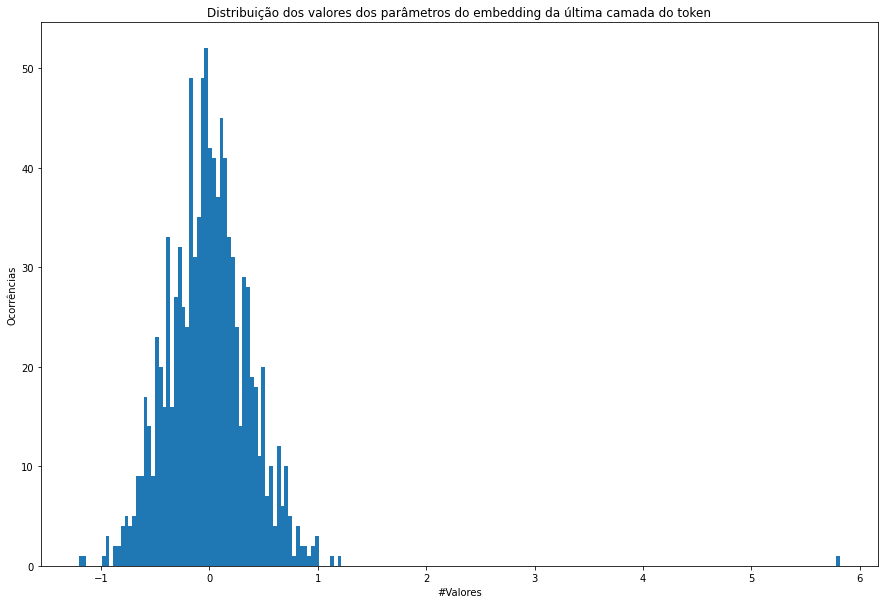

In [18]:
# Import da biblioteca gráfica
import matplotlib.pyplot as plt
%matplotlib inline

# Plota os tokens da sentença
token_i = 6
layer_i = 0

# Recupera o vetor de embeddings da camada para o token
vec = last_hidden_states[layer_i][token_i]

# Mostra a palavra do token_i
print((texto_tokenizado[token_i], tokens_indexados[token_i]))

# Aumenta o tamanho da plotagem do gráfico
plt.figure(figsize=(15,10))

# Título do gráfico
plt.title('Distribuição dos valores dos parâmetros do embedding da última camada do token')
# Texto do eixo x
plt.xlabel('#Valores')
# Texto do eixo y
plt.ylabel('Ocorrências')

# Cria o histograma com 200 classes
plt.hist(vec, bins=200)

# Mostra o gráfico
plt.show()

Vamos nos livrar da dimensão lotes "batches", pois não precisamos dela.

In [19]:
print ("O vetor da última camada oculta tem o formato:", last_hidden_states.size())

# Remove a dimensão 1, o lote "batches".
# O método ´squeeze´ remove a primeira dimensão(0) pois possui tamanho 1
token_embeddings = torch.squeeze(last_hidden_states, dim=0)

print ("O vetor de tokens de embedding da senteça tem o formato:", token_embeddings.size())

O vetor da última camada oculta tem o formato: torch.Size([1, 23, 1024])
O vetor de tokens de embedding da senteça tem o formato: torch.Size([23, 1024])


Confirmando vetores dependentes do contexto


In [20]:
for i, token_str in enumerate(texto_tokenizado):
  print (i, token_str)

0 [CLS]
1 after
2 stealing
3 money
4 from
5 the
6 bank
7 vault
8 ,
9 the
10 bank
11 robber
12 was
13 seen
14 fishing
15 on
16 the
17 amazon
18 ##as
19 river
20 bank
21 .
22 [SEP]


Exibe os embenddings das palavras

A banco aparece nos índices 6, 10 e 20.


In [21]:
# Índice das palavras a serem comparadas
palavra1 = 6
palavra2 = 10
palavra3 = 20

print('Os primeiros 5 valores de cada instância de "bank".')
print('')
print(texto_tokenizado[palavra1], str(token_embeddings[palavra1][:5]))
print(texto_tokenizado[palavra2], str(token_embeddings[palavra2][:5]))
print(texto_tokenizado[palavra3], str(token_embeddings[palavra3][:5]))

Os primeiros 5 valores de cada instância de "bank".

bank tensor([-0.5037, -0.3933,  0.0985, -0.0255, -0.5467])
bank tensor([-0.8993, -0.5849, -0.0178, -0.0673, -0.7716])
bank tensor([-0.7540, -0.0489, -0.1291,  0.0397, -0.2409])


#### Comparando as palavras das frases
Podemos ver que os valores diferem, mas vamos calcular a semelhança de cosseno entre os vetores para fazer uma comparação mais precisa.

In [22]:
from scipy.spatial.distance import cosine

print("Período:", texto)
print("Palavra1=", palavra1, "=", texto_tokenizado[palavra1], "(instituição financeira)")
print("Palavra2=", palavra2, "=", texto_tokenizado[palavra2], "(instituição financeira)")
print("Palavra3=", palavra3, "=", texto_tokenizado[palavra3], "(margem do rio)")

# Calcula a similaridade de coseno entre as palavras banco
# Em "ladrão de banco" versus "banco da praça" (diferentes significados).
banco_diferente = 1 - cosine(token_embeddings[palavra2], token_embeddings[palavra3])

print('Vetor de similaridade  para diferentes significados(',palavra2,',',palavra3,'):  %.2f' % banco_diferente)

# Calcula a similaridade de coseno entre as palavras banco
# Em "ladrão de banco" versus "cofre do banco" (mesmo significado).
mesmo_banco = 1 - cosine(token_embeddings[palavra2], token_embeddings[palavra1])

print('Vetor de similaridade  para mesmo significado(',palavra2,',',palavra1,'):  %.2f' % mesmo_banco)

# Calcula a similaridade de coseno entre as palavras banco
# Em "cofre do banco" versus "banco da praça" (diferente significados).
banco_diferente2 = 1 - cosine(token_embeddings[palavra3], token_embeddings[palavra1])

print('Vetor de similaridade  para diferentes significados(',palavra3,',',palavra1,'):  %.2f' % banco_diferente2)

Período: After stealing money from the bank vault, the bank robber was seen fishing on the Amazonas river bank.
Palavra1= 6 = bank (instituição financeira)
Palavra2= 10 = bank (instituição financeira)
Palavra3= 20 = bank (margem do rio)
Vetor de similaridade  para diferentes significados( 10 , 20 ):  0.61
Vetor de similaridade  para mesmo significado( 10 , 6 ):  0.94
Vetor de similaridade  para diferentes significados( 20 , 6 ):  0.59


#### Visualizando a Frase

Aqui, queremos mostrar a conexão entre os tokens de uma frase usando a incorporação do BERT. Plotamos as inserções dos tokens em um subespaço, onde (0,1) e (1,0) são os marcadores de partida [CLS] e [SEP] e marcadores finais e finais da frase.

In [23]:
# Import das bibliotecas
import numpy as np
import torch

import matplotlib.pyplot as plt
%matplotlib inline

Transforma  o vetor de embendings em um array.

In [24]:
# Transforma tokens embeddings em um array
embeddings = token_embeddings.numpy()

Base selecionada para que o [CLS] e o [SEP] passem para (0,1) e (1,0)

In [25]:
# Converte para um array
W = np.array(embeddings)
# Transforma em um array
B = np.array([embeddings[0], embeddings[-1]])
# Inverte B.T
Bi = np.linalg.pinv(B.T)

Projeta os tokens da palavra no subespaço

In [26]:
Wp = np.matmul(Bi,W.T)

Plota o gráfico da frase

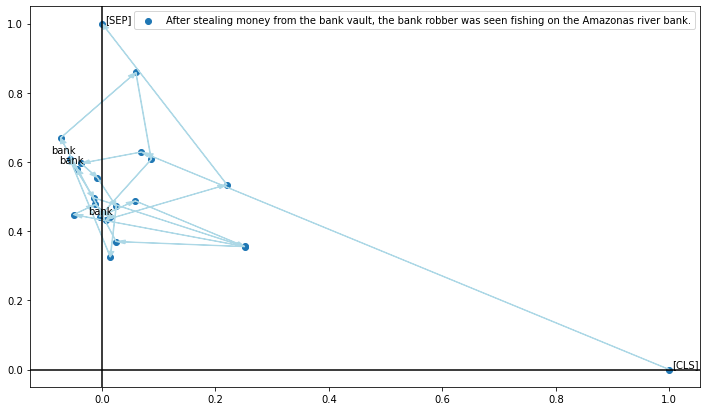

In [27]:
# Aumenta o tamanho da plotagem do gráfico
plt.figure(figsize=(12,7))
plt.axhline(color='black')
plt.axvline(color='black')
plt.scatter(Wp[0,:], Wp[1,:], label=texto)
rX = max(Wp[0,:])-min(Wp[0,:])
rY = max(Wp[1,:])-min(Wp[1,:])
rM = max(rX, rY)
eps = 0.005
for i, token in enumerate(texto_tokenizado):
    if token in ['[CLS]', '[SEP]']:
        plt.annotate(token, (Wp[0,i]+rX*eps, Wp[1,i]+rX*eps))
    if token == 'bank':
        plt.annotate(token, (Wp[0,i]+rX*eps*-6, Wp[1,i]+rX*eps*3))
    if i>0:
        plt.arrow(Wp[0,i-1],Wp[1,i-1], Wp[0,i]-Wp[0,i-1], Wp[1,i]-Wp[1,i-1], color='lightblue', head_length=rM*eps*3, head_width=rM*eps*2, length_includes_head=True)
plt.legend()

# Mostra o gráfico
plt.show()

#### Comparando as orações

Dividindo a frase em três orações.

['[CLS]', 'after', 'stealing', 'money', 'from', 'the', 'bank', 'vault', '[SEP]']
['[CLS]', 'the', 'bank', 'robber', 'was', 'seen', '[SEP]']
['[CLS]', 'fishing', 'on', 'the', 'mississippi', 'river', 'bank', '.', '[SEP]']


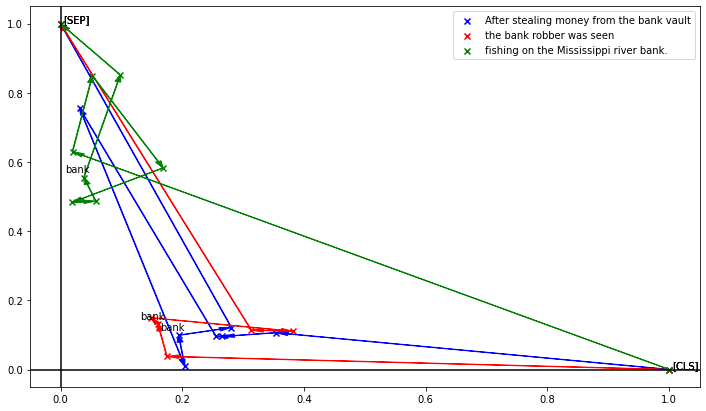

In [28]:
textopt_br = ["Depois de roubar o cofre do banco",
              "o ladrão de banco foi visto",
              "sentado no banco da praça central."]

texto = ["After stealing money from the bank vault",
         "the bank robber was seen",
         "fishing on the Mississippi river bank."]

colors = ['blue', 'red', 'green']

# Aumenta o tamanho da plotagem do gráfico
plt.figure(figsize=(12,7))
plt.axhline(color='black')
plt.axvline(color='black')
for n,frase in enumerate(texto):
    Wp, tokens = getEmbeddingsVisualUltimaCamada(frase, model, tokenizer)
    print(tokens)
    plt.scatter(Wp[0,:], Wp[1,:], color=colors[n], marker='x', label=frase)
    rX = max(Wp[0,:])-min(Wp[0,:])
    rY = max(Wp[1,:])-min(Wp[1,:])
    rM = max(rX, rY)
    eps = 0.005
    eps2 = 0.005
    for i, token in enumerate(tokens):
        if token in ['[CLS]', '[SEP]']:
            plt.annotate(token, (Wp[0,i]+rX*eps, Wp[1,i]+rX*eps))
        if token == 'bank':
            plt.annotate(token, (Wp[0,i]+rX*eps*-6, Wp[1,i]+rX*eps*3))
        if i>0:
            plt.arrow(Wp[0,i-1],Wp[1,i-1], Wp[0,i]-Wp[0,i-1], Wp[1,i]-Wp[1,i-1], color=colors[n], head_length=rM*eps2*4, head_width=rM*eps2*2, length_includes_head=True)
plt.legend()

# Mostra o gráfico
plt.show()       

### 6.2 - Com a soma das 4 últimas camadas

#### Inicialização

In [29]:
# Define um sentença de exemplo com diversos significados( da palavra  "bank"
textopt_br = "Depois de roubar o cofre do banco,"\
        " o ladrão de banco foi visto " \
        "sentado no banco da praça central."

texto  = "After stealing money from the bank vault, "\
        "the bank robber was seen " \
        "fishing on the Amazonas river bank."

# Adiciona os tokens especiais
texto_marcado = "[CLS] " + texto + " [SEP]"

# Divide a sentença em tokens
texto_tokenizado = tokenizer.tokenize(texto_marcado)

# Mapeia os tokens em seus índices do vocabulário
tokens_indexados = tokenizer.convert_tokens_to_ids(texto_tokenizado)

# Mostra os tokens com seus índices
i = 0
for tup in zip(texto_tokenizado, tokens_indexados):
    print('{:>3} {:<12} {:>6,}'.format(i, tup[0], tup[1]))
    i= i + 1

  0 [CLS]           101
  1 after         2,044
  2 stealing     11,065
  3 money         2,769
  4 from          2,013
  5 the           1,996
  6 bank          2,924
  7 vault        11,632
  8 ,             1,010
  9 the           1,996
 10 bank          2,924
 11 robber       27,307
 12 was           2,001
 13 seen          2,464
 14 fishing       5,645
 15 on            2,006
 16 the           1,996
 17 amazon        9,733
 18 ##as          3,022
 19 river         2,314
 20 bank          2,924
 21 .             1,012
 22 [SEP]           102


O BERT é treinado e espera pares de frases, usando 1s e 0s para distinguir entre as duas frases. Ou seja, para cada token em "texto_tokenizado", devemos especificar a qual frase pertence: sentença 0 (uma série de 0s) ou sentença 1 (uma série de 1s). Para nossos propósitos, as entradas de sentença única requerem apenas uma série de 1s; portanto, criaremos um vetor de 1s para cada token em nossa frase de entrada.

Se você deseja processar duas frases, atribua cada palavra na primeira frase mais o token '[SEP]' a 0 e todos os tokens da segunda frase a 1.

In [30]:
# Marca cada um dos tokens como pertencentes à frase "1", pois só iremos analisar uma.
mascara_atencao = [1] * len(texto_tokenizado)

print (mascara_atencao)
print (len(mascara_atencao))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
23


Converte 'tokens_indexados' e 'semegmentos_ids' em  listas em tensores.

In [31]:
# Importa a bibliteca
import torch

# Converte as entradas de listas para tensores do torch
tokens_tensores = torch.as_tensor([tokens_indexados])
mascara_atencao_tensores = torch.as_tensor([mascara_atencao])

Gera os embeddings para a frase e retorna a saída em  `outputs`.


In [32]:
# Prediz os atributos dos estados ocultos para cada camada
with torch.no_grad():    
  
    # Retorno de model quando output_hidden_states=True´ é setado:    
    #outputs[0] = last_hidden_state, outputs[1] = pooler_output, outputs[2] = hidden_states
    outputs = model(tokens_tensores, mascara_atencao_tensores)

#### Visualizando o intervalo de valores

Recupera a soma das 4 últimas camadas.

In [33]:
# Recupera a soma das 4 últimas camadas ocultas da saída
sum_4_last_layers = getEmbeddingSoma4UltimasCamadas(outputs)

print ("O vetor da última camada oculta tem o formato:", sum_4_last_layers.size())

O vetor da última camada oculta tem o formato: torch.Size([1, 23, 1024])


Plota de valores para o token.

('bank', 2924)


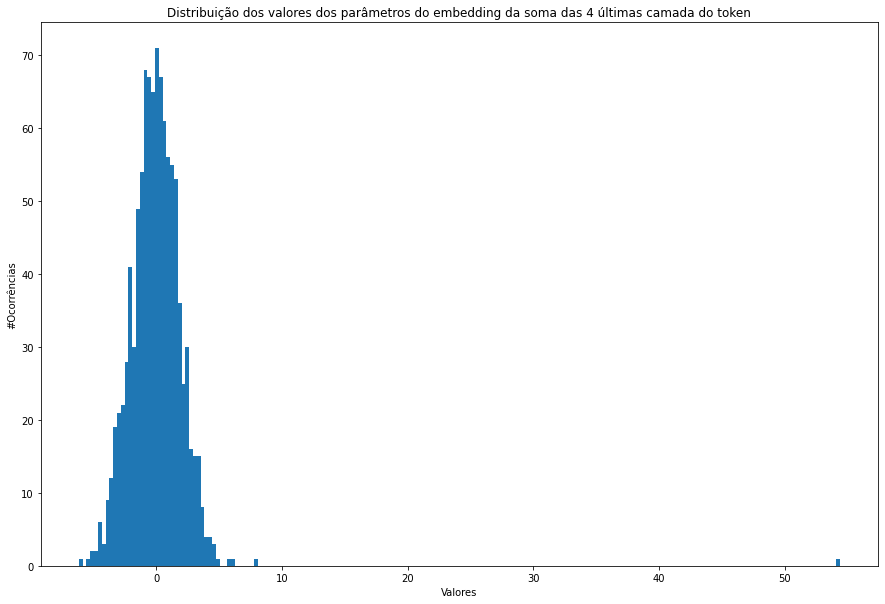

In [34]:
# Import da biblioteca gráfica
import matplotlib.pyplot as plt
%matplotlib inline

# Plota os tokens da sentença
token_i = 6
layer_i = 0

# Recupera o vetor de embeddings da camada para o token
vec = sum_4_last_layers[layer_i][token_i]

# Mostra a palavra do token_i
print((texto_tokenizado[token_i], tokens_indexados[token_i]))

# Aumenta o tamanho da plotagem do gráfico
plt.figure(figsize=(15,10))

# Título do gráfico
plt.title('Distribuição dos valores dos parâmetros do embedding da soma das 4 últimas camada do token')
# Texto do eixo x
plt.xlabel('Valores')
# Texto do eixo y
plt.ylabel('#Ocorrências')

# Cria o histograma com 200 classes
plt.hist(vec, bins=200)

# Mostra o gráfico
plt.show()

Vamos nos livrar da dimensão lotes "batches", pois não precisamos dela.

In [35]:
print ("O vetor da soma das 4 últimas camadas ocultas tem o formato:", sum_4_last_layers.size())

# Remove a dimensão 1, o lote "batches".
# O método ´squeeze´ remove a primeira dimensão(0) pois possui tamanho 1
token_embeddings = torch.squeeze(sum_4_last_layers, dim=0)

print ("O vetor de tokens de embedding da senteça tem o formato:", token_embeddings.size())

O vetor da soma das 4 últimas camadas ocultas tem o formato: torch.Size([1, 23, 1024])
O vetor de tokens de embedding da senteça tem o formato: torch.Size([23, 1024])


Confirmando vetores dependentes do contexto


In [36]:
for i, token_str in enumerate(texto_tokenizado):
  print (i, token_str)

0 [CLS]
1 after
2 stealing
3 money
4 from
5 the
6 bank
7 vault
8 ,
9 the
10 bank
11 robber
12 was
13 seen
14 fishing
15 on
16 the
17 amazon
18 ##as
19 river
20 bank
21 .
22 [SEP]


Exibe os embenddings das palavras

A banco aparece nos índices 6, 10 e 20.


In [37]:
# Índice das palavras a serem comparadas
palavra1 = 6
palavra2 = 10
palavra3 = 20

print('Os primeiros 5 valores de cada instância de "bank".')
print('')
print(texto_tokenizado[palavra1], str(token_embeddings[palavra1][:5]))
print(texto_tokenizado[palavra2], str(token_embeddings[palavra2][:5]))
print(texto_tokenizado[palavra3], str(token_embeddings[palavra3][:5]))

Os primeiros 5 valores de cada instância de "bank".

bank tensor([-3.3722, -1.7388,  0.1391,  0.3340, -3.7612])
bank tensor([-5.4103, -3.1548, -0.2838,  0.3327, -5.2784])
bank tensor([-1.9539,  1.1193,  0.8373,  0.2257, -2.3563])


#### Comparando as palavras das frases
Podemos ver que os valores diferem, mas vamos calcular a semelhança de cosseno entre os vetores para fazer uma comparação mais precisa.

In [38]:
from scipy.spatial.distance import cosine

print("Período:", texto)
print("Palavra1=", palavra1, "=", texto_tokenizado[palavra1], "(instituição financeira)")
print("Palavra2=", palavra2, "=", texto_tokenizado[palavra2], "(instituição financeira)")
print("Palavra3=", palavra3, "=", texto_tokenizado[palavra3], "(margem do rio)")

# Calcula a similaridade de coseno entre as palavras banco
# Em "ladrão de banco" versus "banco da praça" (diferentes significados).
banco_diferente = 1 - cosine(token_embeddings[palavra2], token_embeddings[palavra3])

print('Vetor de similaridade  para diferentes significados(',palavra2,',',palavra3,'):  %.2f' % banco_diferente)

# Calcula a similaridade de coseno entre as palavras banco
# Em "ladrão de banco" versus "cofre do banco" (mesmo significado).
mesmo_banco = 1 - cosine(token_embeddings[palavra2], token_embeddings[palavra1])

print('Vetor de similaridade  para mesmo significado(',palavra2,',',palavra1,'):  %.2f' % mesmo_banco)

# Calcula a similaridade de coseno entre as palavras banco
# Em "cofre do banco" versus "banco da praça" (diferente significados).
banco_diferente2 = 1 - cosine(token_embeddings[palavra3], token_embeddings[palavra1])

print('Vetor de similaridade  para diferentes significados(',palavra3,',',palavra1,'):  %.2f' % banco_diferente2)

Período: After stealing money from the bank vault, the bank robber was seen fishing on the Amazonas river bank.
Palavra1= 6 = bank (instituição financeira)
Palavra2= 10 = bank (instituição financeira)
Palavra3= 20 = bank (margem do rio)
Vetor de similaridade  para diferentes significados( 10 , 20 ):  0.66
Vetor de similaridade  para mesmo significado( 10 , 6 ):  0.94
Vetor de similaridade  para diferentes significados( 20 , 6 ):  0.67


#### Visualizando a Frase

Aqui, queremos mostrar a conexão entre os tokens de uma frase usando a incorporação do BERT. Plotamos as inserções dos tokens em um subespaço, onde (0,1) e (1,0) são os marcadores de partida [CLS] e [SEP] e marcadores finais e finais da frase.

In [39]:
# Import das bibliotecas
import numpy as np
import torch

import matplotlib.pyplot as plt
%matplotlib inline

Transforma  o vetor de embendings em um array.

In [40]:
# Transforma tokens embeddings em um array
embeddings = token_embeddings.numpy()

Base selecionada para que o [CLS] e o [SEP] passem para (0,1) e (1,0)

In [41]:
# Converte para um array
W = np.array(embeddings)
# Transforma em um array
B = np.array([embeddings[0], embeddings[-1]])
# Inverte B.T
Bi = np.linalg.pinv(B.T)

Projeta os tokens da palavra no subespaço

In [42]:
Wp = np.matmul(Bi,W.T)

Plota o gráfico da frase

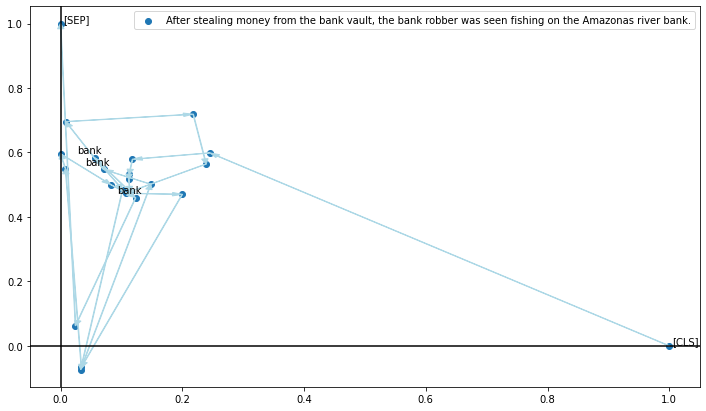

In [43]:
# Aumenta o tamanho da plotagem do gráfico
plt.figure(figsize=(12,7))
plt.axhline(color='black')
plt.axvline(color='black')
plt.scatter(Wp[0,:], Wp[1,:], label=texto)
rX = max(Wp[0,:])-min(Wp[0,:])
rY = max(Wp[1,:])-min(Wp[1,:])
rM = max(rX, rY)
eps = 0.005
for i, token in enumerate(texto_tokenizado):
    if token in ['[CLS]', '[SEP]']:
        plt.annotate(token, (Wp[0,i]+rX*eps, Wp[1,i]+rX*eps))
    if token == 'bank':
        plt.annotate(token, (Wp[0,i]+rX*eps*-6, Wp[1,i]+rX*eps*3))
    if i>0:
        plt.arrow(Wp[0,i-1],Wp[1,i-1], Wp[0,i]-Wp[0,i-1], Wp[1,i]-Wp[1,i-1], color='lightblue', head_length=rM*eps*3, head_width=rM*eps*2, length_includes_head=True)
plt.legend()

# Mostra o gráfico
plt.show()

#### Comparando as orações

Dividindo a frase em três orações.

['[CLS]', 'after', 'stealing', 'money', 'from', 'the', 'bank', 'vault', '[SEP]']
['[CLS]', 'the', 'bank', 'robber', 'was', 'seen', '[SEP]']
['[CLS]', 'fishing', 'on', 'the', 'mississippi', 'river', 'bank', '.', '[SEP]']


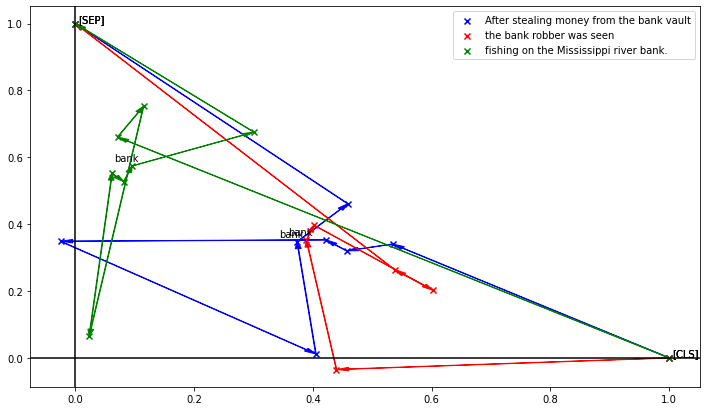

In [44]:
textopt_br = ["Depois de roubar o cofre do banco",
              "o ladrão de banco foi visto",
              "sentado no banco da praça central."]

texto = ["After stealing money from the bank vault",
         "the bank robber was seen",
         "fishing on the Mississippi river bank."]

colors = ['blue', 'red', 'green']

# Aumenta o tamanho da plotagem do gráfico
plt.figure(figsize=(12,7))
plt.axhline(color='black')
plt.axvline(color='black')
for n,frase in enumerate(texto):
    Wp, tokens = getEmbeddingsVisualSoma4UltimasCamadas(frase, model, tokenizer)
    print(tokens)
    plt.scatter(Wp[0,:], Wp[1,:], color=colors[n], marker='x', label=frase)
    rX = max(Wp[0,:])-min(Wp[0,:])
    rY = max(Wp[1,:])-min(Wp[1,:])
    rM = max(rX, rY)
    eps = 0.005
    eps2 = 0.005
    for i, token in enumerate(tokens):
        if token in ['[CLS]', '[SEP]']:
            plt.annotate(token, (Wp[0,i]+rX*eps, Wp[1,i]+rX*eps))
        if token == 'bank':
            plt.annotate(token, (Wp[0,i]+rX*eps*-6, Wp[1,i]+rX*eps*3))
        if i>0:
            plt.arrow(Wp[0,i-1],Wp[1,i-1], Wp[0,i]-Wp[0,i-1], Wp[1,i]-Wp[1,i-1], color=colors[n], head_length=rM*eps2*4, head_width=rM*eps2*2, length_includes_head=True)
plt.legend()

# Mostra o gráfico
plt.show()       

### 6.3 - Com a concatenação das 4 últimas camadas

#### Inicialização

In [45]:
# Define um sentença de exemplo com diversos significados( da palavra  "bank"
textopt_br = "Depois de roubar o cofre do banco,"\
        " o ladrão de banco foi visto " \
        "sentado no banco da praça central."

texto  = "After stealing money from the bank vault, "\
        "the bank robber was seen " \
        "fishing on the Amazonas river bank."

# Adiciona os tokens especiais
texto_marcado = "[CLS] " + texto + " [SEP]"

# Divide a sentença em tokens
texto_tokenizado = tokenizer.tokenize(texto_marcado)

# Mapeia os tokens em seus índices do vocabulário
tokens_indexados = tokenizer.convert_tokens_to_ids(texto_tokenizado)

# Mostra os tokens com seus índices
i = 0
for tup in zip(texto_tokenizado, tokens_indexados):
    print('{:>3} {:<12} {:>6,}'.format(i, tup[0], tup[1]))
    i= i + 1

  0 [CLS]           101
  1 after         2,044
  2 stealing     11,065
  3 money         2,769
  4 from          2,013
  5 the           1,996
  6 bank          2,924
  7 vault        11,632
  8 ,             1,010
  9 the           1,996
 10 bank          2,924
 11 robber       27,307
 12 was           2,001
 13 seen          2,464
 14 fishing       5,645
 15 on            2,006
 16 the           1,996
 17 amazon        9,733
 18 ##as          3,022
 19 river         2,314
 20 bank          2,924
 21 .             1,012
 22 [SEP]           102


O BERT é treinado e espera pares de frases, usando 1s e 0s para distinguir entre as duas frases. Ou seja, para cada token em "texto_tokenizado", devemos especificar a qual frase pertence: sentença 0 (uma série de 0s) ou sentença 1 (uma série de 1s). Para nossos propósitos, as entradas de sentença única requerem apenas uma série de 1s; portanto, criaremos um vetor de 1s para cada token em nossa frase de entrada.

Se você deseja processar duas frases, atribua cada palavra na primeira frase mais o token '[SEP]' a 0 e todos os tokens da segunda frase a 1.

In [46]:
# Marca cada um dos tokens como pertencentes à frase "1", pois só iremos analisar uma.
mascara_atencao = [1] * len(texto_tokenizado)

print (mascara_atencao)
print (len(mascara_atencao))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
23


Converte 'tokens_indexados' e 'semegmentos_ids' em  listas em tensores.

In [47]:
# Importa a bibliteca
import torch

# Converte as entradas de listas para tensores do torch
tokens_tensores = torch.as_tensor([tokens_indexados])
mascara_atencao_tensores = torch.as_tensor([mascara_atencao])

Gera os embeddings para a frase e retorna a saída em  `outputs`.


In [48]:
# Prediz os atributos dos estados ocultos para cada camada
with torch.no_grad():    
  
    # Retorno de model quando output_hidden_states=True´ é setado:    
    #outputs[0] = last_hidden_state, outputs[1] = pooler_output, outputs[2] = hidden_states
    outputs = model(tokens_tensores, mascara_atencao_tensores)

#### Visualizando o intervalo de valores

Recupera a soma das 4 últimas camadas.

In [49]:
# Recupera a concatenação das 4 últimas camadas ocultas da saída
concat_4_last_layers = getEmbeddingConcat4UltimasCamadas(outputs)

print ("O vetor da concatenação das 4 últimas camadas ocultas tem o formato:", concat_4_last_layers.size())

O vetor da concatenação das 4 últimas camadas ocultas tem o formato: torch.Size([1, 23, 4096])


Plota de valores para o token.

('bank', 2924)


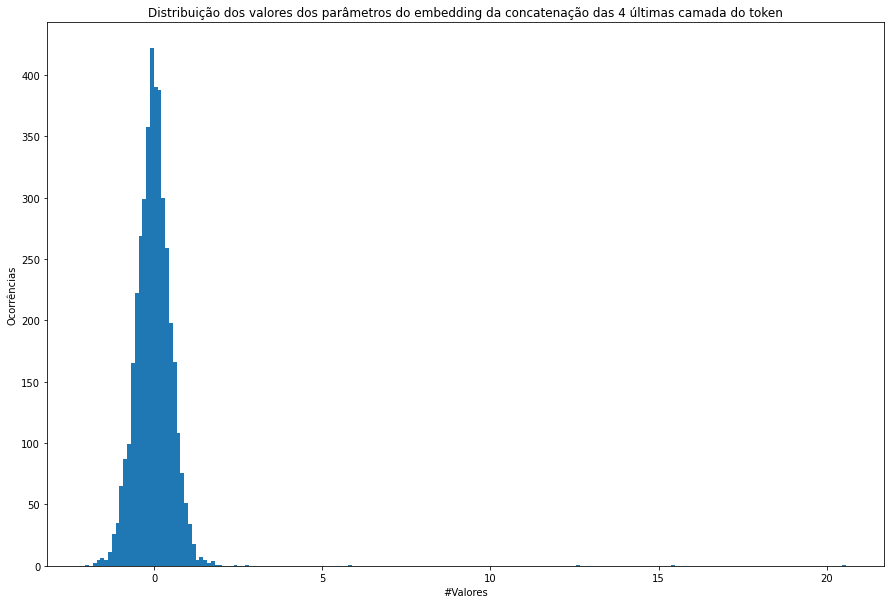

In [50]:
# Import da biblioteca gráfica
import matplotlib.pyplot as plt
%matplotlib inline

# Plota os tokens da sentença
token_i = 6
layer_i = 0

# Recupera o vetor de embeddings da camada para o token
vec = concat_4_last_layers[layer_i][token_i]

# Mostra a palavra do token_i
print((texto_tokenizado[token_i], tokens_indexados[token_i]))

# Aumenta o tamanho da plotagem do gráfico
plt.figure(figsize=(15,10))

# Título do gráfico
plt.title('Distribuição dos valores dos parâmetros do embedding da concatenação das 4 últimas camada do token')
# Texto do eixo x
plt.xlabel('#Valores')
# Texto do eixo y
plt.ylabel('Ocorrências')

# Cria o histograma com 200 classes
plt.hist(vec, bins=200)

# Mostra o gráfico
plt.show()

Vamos nos livrar da dimensão lotes "batches", pois não precisamos dela.

In [51]:
print ("O vetor da concatenação das 4 últimas camadas ocultas tem o formato:", concat_4_last_layers.size())

# Remove a dimensão 1, o lote "batches".
# O método ´squeeze´ remove a primeira dimensão(0) pois possui tamanho 1
token_embeddings = torch.squeeze(concat_4_last_layers, dim=0)

print ("O vetor de tokens de embedding da senteça tem o formato:", token_embeddings.size())

O vetor da concatenação das 4 últimas camadas ocultas tem o formato: torch.Size([1, 23, 4096])
O vetor de tokens de embedding da senteça tem o formato: torch.Size([23, 4096])


Confirmando vetores dependentes do contexto


In [52]:
for i, token_str in enumerate(texto_tokenizado):
  print (i, token_str)

0 [CLS]
1 after
2 stealing
3 money
4 from
5 the
6 bank
7 vault
8 ,
9 the
10 bank
11 robber
12 was
13 seen
14 fishing
15 on
16 the
17 amazon
18 ##as
19 river
20 bank
21 .
22 [SEP]


Exibe os embenddings das palavras

A banco aparece nos índices 6, 10 e 20.


In [53]:
# Índice das palavras a serem comparadas
palavra1 = 6
palavra2 = 10
palavra3 = 20

print('Os primeiros 5 valores de cada instância de "bank".')
print('')
print(texto_tokenizado[palavra1], str(token_embeddings[palavra1][:5]))
print(texto_tokenizado[palavra2], str(token_embeddings[palavra2][:5]))
print(texto_tokenizado[palavra3], str(token_embeddings[palavra3][:5]))

Os primeiros 5 valores de cada instância de "bank".

bank tensor([-0.5037, -0.3933,  0.0985, -0.0255, -0.5467])
bank tensor([-0.8993, -0.5849, -0.0178, -0.0673, -0.7716])
bank tensor([-0.7540, -0.0489, -0.1291,  0.0397, -0.2409])


#### Comparando as palavras das frases
Podemos ver que os valores diferem, mas vamos calcular a semelhança de cosseno entre os vetores para fazer uma comparação mais precisa.

In [54]:
from scipy.spatial.distance import cosine

print("Período:", texto)
print("Palavra1=", palavra1, "=", texto_tokenizado[palavra1], "(instituição financeira)")
print("Palavra2=", palavra2, "=", texto_tokenizado[palavra2], "(instituição financeira)")
print("Palavra3=", palavra3, "=", texto_tokenizado[palavra3], "(margem do rio)")

# Calcula a similaridade de coseno entre as palavras banco
# Em "ladrão de banco" versus "banco da praça" (diferentes significados).
banco_diferente = 1 - cosine(token_embeddings[palavra2], token_embeddings[palavra3])

print('Vetor de similaridade  para diferentes significados(',palavra2,',',palavra3,'):  %.2f' % banco_diferente)

# Calcula a similaridade de coseno entre as palavras banco
# Em "ladrão de banco" versus "cofre do banco" (mesmo significado).
mesmo_banco = 1 - cosine(token_embeddings[palavra2], token_embeddings[palavra1])

print('Vetor de similaridade  para mesmo significado(',palavra2,',',palavra1,'):  %.2f' % mesmo_banco)

# Calcula a similaridade de coseno entre as palavras banco
# Em "cofre do banco" versus "banco da praça" (diferente significados).
banco_diferente2 = 1 - cosine(token_embeddings[palavra3], token_embeddings[palavra1])

print('Vetor de similaridade  para diferentes significados(',palavra3,',',palavra1,'):  %.2f' % banco_diferente2)

Período: After stealing money from the bank vault, the bank robber was seen fishing on the Amazonas river bank.
Palavra1= 6 = bank (instituição financeira)
Palavra2= 10 = bank (instituição financeira)
Palavra3= 20 = bank (margem do rio)
Vetor de similaridade  para diferentes significados( 10 , 20 ):  0.66
Vetor de similaridade  para mesmo significado( 10 , 6 ):  0.94
Vetor de similaridade  para diferentes significados( 20 , 6 ):  0.66


#### Visualizando a Frase

Aqui, queremos mostrar a conexão entre os tokens de uma frase usando a incorporação do BERT. Plotamos as inserções dos tokens em um subespaço, onde (0,1) e (1,0) são os marcadores de partida [CLS] e [SEP] e marcadores finais e finais da frase.

In [55]:
# Import das bibliotecas
import numpy as np
import torch

import matplotlib.pyplot as plt
%matplotlib inline

Transforma  o vetor de embendings em um array.

In [56]:
# Transforma tokens embeddings em um array
embeddings = token_embeddings.numpy()

Base selecionada para que o [CLS] e o [SEP] passem para (0,1) e (1,0)

In [57]:
# Converte para um array
W = np.array(embeddings)
# Transforma em um array
B = np.array([embeddings[0], embeddings[-1]])
# Inverte B.T
Bi = np.linalg.pinv(B.T)

Projeta os tokens da palavra no subespaço

In [58]:
Wp = np.matmul(Bi,W.T)

Plota o gráfico da frase

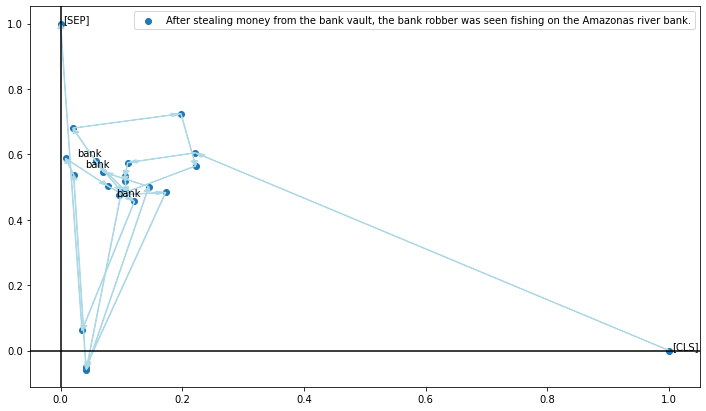

In [59]:
# Aumenta o tamanho da plotagem do gráfico
plt.figure(figsize=(12,7))
plt.axhline(color='black')
plt.axvline(color='black')
plt.scatter(Wp[0,:], Wp[1,:], label=texto)
rX = max(Wp[0,:])-min(Wp[0,:])
rY = max(Wp[1,:])-min(Wp[1,:])
rM = max(rX, rY)
eps = 0.005
for i, token in enumerate(texto_tokenizado):
    if token in ['[CLS]', '[SEP]']:
        plt.annotate(token, (Wp[0,i]+rX*eps, Wp[1,i]+rX*eps))
    if token == 'bank':
        plt.annotate(token, (Wp[0,i]+rX*eps*-6, Wp[1,i]+rX*eps*3))
    if i>0:
        plt.arrow(Wp[0,i-1],Wp[1,i-1], Wp[0,i]-Wp[0,i-1], Wp[1,i]-Wp[1,i-1], color='lightblue', head_length=rM*eps*3, head_width=rM*eps*2, length_includes_head=True)
plt.legend()

# Mostra o gráfico
plt.show()

#### Comparando as orações

Dividindo a frase em três orações.

['[CLS]', 'after', 'stealing', 'money', 'from', 'the', 'bank', 'vault', '[SEP]']
['[CLS]', 'the', 'bank', 'robber', 'was', 'seen', '[SEP]']
['[CLS]', 'fishing', 'on', 'the', 'mississippi', 'river', 'bank', '.', '[SEP]']


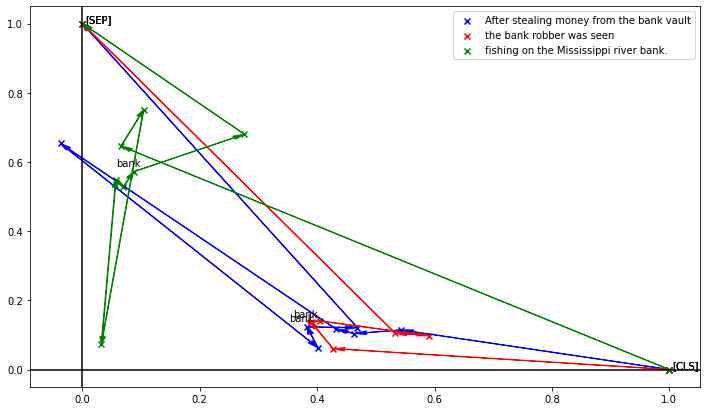

In [60]:
textopt_br = ["Depois de roubar o cofre do banco",
              "o ladrão de banco foi visto",
              "sentado no banco da praça central."]

texto = ["After stealing money from the bank vault",
         "the bank robber was seen",
         "fishing on the Mississippi river bank."]

colors = ['blue', 'red', 'green']

# Aumenta o tamanho da plotagem do gráfico
plt.figure(figsize=(12,7))
plt.axhline(color='black')
plt.axvline(color='black')
for n,frase in enumerate(texto):
    Wp, tokens = getEmbeddingsVisualConcat4UltimasCamadas(frase, model, tokenizer)
    print(tokens)
    plt.scatter(Wp[0,:], Wp[1,:], color=colors[n], marker='x', label=frase)
    rX = max(Wp[0,:])-min(Wp[0,:])
    rY = max(Wp[1,:])-min(Wp[1,:])
    rM = max(rX, rY)
    eps = 0.005
    eps2 = 0.005
    for i, token in enumerate(tokens):
        if token in ['[CLS]', '[SEP]']:
            plt.annotate(token, (Wp[0,i]+rX*eps, Wp[1,i]+rX*eps))
        if token == 'bank':
            plt.annotate(token, (Wp[0,i]+rX*eps*-6, Wp[1,i]+rX*eps*3))
        if i>0:
            plt.arrow(Wp[0,i-1],Wp[1,i-1], Wp[0,i]-Wp[0,i-1], Wp[1,i]-Wp[1,i-1], color=colors[n], head_length=rM*eps2*4, head_width=rM*eps2*2, length_includes_head=True)
plt.legend()

# Mostra o gráfico
plt.show()       

### 6.4 - Com a soma de todas camadas

#### Inicialização

In [61]:
# Define um sentença de exemplo com diversos significados( da palavra  "bank"
textopt_br = "Depois de roubar o cofre do banco,"\
        " o ladrão de banco foi visto " \
        "sentado no banco da praça central."

texto  = "After stealing money from the bank vault, "\
        "the bank robber was seen " \
        "fishing on the Amazonas river bank."

# Adiciona os tokens especiais
texto_marcado = "[CLS] " + texto + " [SEP]"

# Divide a sentença em tokens
texto_tokenizado = tokenizer.tokenize(texto_marcado)

# Mapeia os tokens em seus índices do vocabulário
tokens_indexados = tokenizer.convert_tokens_to_ids(texto_tokenizado)

# Mostra os tokens com seus índices
i = 0
for tup in zip(texto_tokenizado, tokens_indexados):
    print('{:>3} {:<12} {:>6,}'.format(i, tup[0], tup[1]))
    i= i + 1

  0 [CLS]           101
  1 after         2,044
  2 stealing     11,065
  3 money         2,769
  4 from          2,013
  5 the           1,996
  6 bank          2,924
  7 vault        11,632
  8 ,             1,010
  9 the           1,996
 10 bank          2,924
 11 robber       27,307
 12 was           2,001
 13 seen          2,464
 14 fishing       5,645
 15 on            2,006
 16 the           1,996
 17 amazon        9,733
 18 ##as          3,022
 19 river         2,314
 20 bank          2,924
 21 .             1,012
 22 [SEP]           102


O BERT é treinado e espera pares de frases, usando 1s e 0s para distinguir entre as duas frases. Ou seja, para cada token em "texto_tokenizado", devemos especificar a qual frase pertence: sentença 0 (uma série de 0s) ou sentença 1 (uma série de 1s). Para nossos propósitos, as entradas de sentença única requerem apenas uma série de 1s; portanto, criaremos um vetor de 1s para cada token em nossa frase de entrada.

Se você deseja processar duas frases, atribua cada palavra na primeira frase mais o token '[SEP]' a 0 e todos os tokens da segunda frase a 1.

In [62]:
# Marca cada um dos tokens como pertencentes à frase "1", pois só iremos analisar uma.
mascara_atencao = [1] * len(texto_tokenizado)

print (mascara_atencao)
print (len(mascara_atencao))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
23


Converte 'tokens_indexados' e 'semegmentos_ids' em  listas em tensores.

In [63]:
# Importa a bibliteca
import torch

# Converte as entradas de listas para tensores do torch
tokens_tensores = torch.as_tensor([tokens_indexados])
mascara_atencao_tensores = torch.as_tensor([mascara_atencao])

Gera os embeddings para a frase e retorna a saída em  `outputs`.


In [64]:
# Prediz os atributos dos estados ocultos para cada camada
with torch.no_grad():    
  
    # Retorno de model quando output_hidden_states=True´ é setado:    
    #outputs[0] = last_hidden_state, outputs[1] = pooler_output, outputs[2] = hidden_states
    outputs = model(tokens_tensores, mascara_atencao_tensores)

#### Visualizando o intervalo de valores

Recupera a soma de todas as camadas.

In [65]:
# Recupera a soma de todas as camadas camada oculta
sum_all_layers = getEmbeddingSomaTodasAsCamada(outputs)

print ("O vetor da soma de todas as camadas ocultas tem o formato:", sum_all_layers.size())

O vetor da soma de todas as camadas ocultas tem o formato: torch.Size([1, 23, 1024])


Plota de valores para o token.

('bank', 2924)


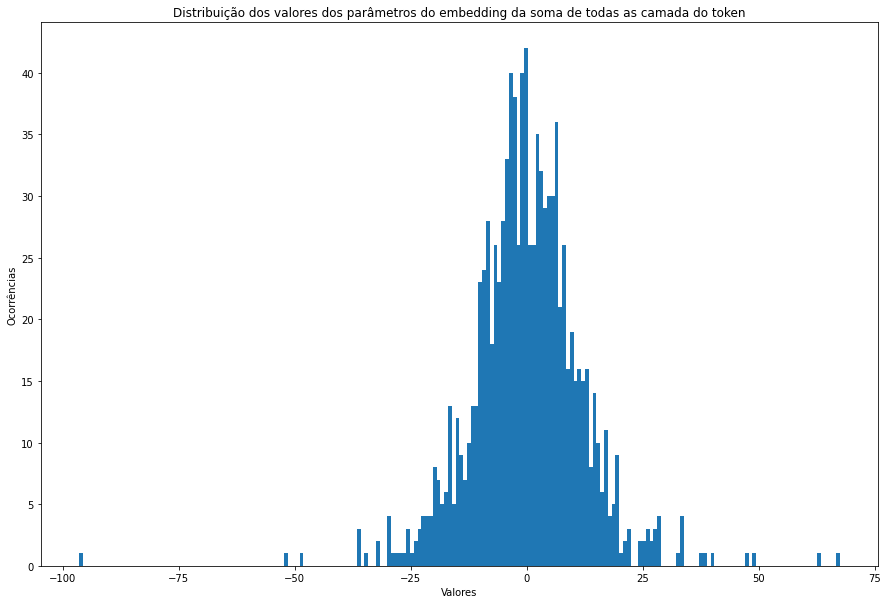

In [66]:
# Import da biblioteca gráfica
import matplotlib.pyplot as plt
%matplotlib inline

# Plota os tokens da sentença
token_i = 6
layer_i = 0

# Recupera o vetor de embeddings da camada para o token
vec = sum_all_layers[layer_i][token_i]

# Mostra a palavra do token_i
print((texto_tokenizado[token_i], tokens_indexados[token_i]))

# Aumenta o tamanho da plotagem do gráfico
plt.figure(figsize=(15,10))

# Título do gráfico
plt.title('Distribuição dos valores dos parâmetros do embedding da soma de todas as camada do token')
# Texto do eixo x
plt.xlabel('Valores')
# Texto do eixo y
plt.ylabel('Ocorrências')

# Cria o histograma com 200 classes
plt.hist(vec, bins=200)

# Mostra o gráfico
plt.show()

Vamos nos livrar da dimensão lotes "batches", pois não precisamos dela.

In [67]:
print ("O vetor da soma de todas as camadas ocultas tem o formato:", sum_all_layers.size())

# Remove a dimensão 1, o lote "batches".
# O método ´squeeze´ remove a primeira dimensão(0) pois possui tamanho 1
token_embeddings = torch.squeeze(sum_all_layers, dim=0)

print ("O vetor de tokens de embedding da senteça tem o formato:", token_embeddings.size())

O vetor da soma de todas as camadas ocultas tem o formato: torch.Size([1, 23, 1024])
O vetor de tokens de embedding da senteça tem o formato: torch.Size([23, 1024])


Confirmando vetores dependentes do contexto


In [68]:
for i, token_str in enumerate(texto_tokenizado):
  print (i, token_str)

0 [CLS]
1 after
2 stealing
3 money
4 from
5 the
6 bank
7 vault
8 ,
9 the
10 bank
11 robber
12 was
13 seen
14 fishing
15 on
16 the
17 amazon
18 ##as
19 river
20 bank
21 .
22 [SEP]


Exibe os embenddings das palavras

A banco aparece nos índices 6, 10 e 20.


In [69]:
# Índice das palavras a serem comparadas
palavra1 = 6
palavra2 = 10
palavra3 = 20

print('Os primeiros 5 valores de cada instância de "bank".')
print('')
print(texto_tokenizado[palavra1], str(token_embeddings[palavra1][:5]))
print(texto_tokenizado[palavra2], str(token_embeddings[palavra2][:5]))
print(texto_tokenizado[palavra3], str(token_embeddings[palavra3][:5]))

Os primeiros 5 valores de cada instância de "bank".

bank tensor([ -4.2152,   4.1015,   4.7453,   8.1103, -17.7092])
bank tensor([-22.9548,  -5.9411,  -0.8793,   9.3588, -18.7124])
bank tensor([ 12.0043,  11.6866,   7.9266,  -3.1875, -15.8727])


#### Comparando as palavras das frases
Podemos ver que os valores diferem, mas vamos calcular a semelhança de cosseno entre os vetores para fazer uma comparação mais precisa.

In [70]:
from scipy.spatial.distance import cosine

print("Período:", texto)
print("Palavra1=", palavra1, "=", texto_tokenizado[palavra1], "(instituição financeira)")
print("Palavra2=", palavra2, "=", texto_tokenizado[palavra2], "(instituição financeira)")
print("Palavra3=", palavra3, "=", texto_tokenizado[palavra3], "(margem do rio)")

# Calcula a similaridade de coseno entre as palavras banco
# Em "ladrão de banco" versus "banco da praça" (diferentes significados).
banco_diferente = 1 - cosine(token_embeddings[palavra2], token_embeddings[palavra3])

print('Vetor de similaridade  para diferentes significados(',palavra2,',',palavra3,'):  %.2f' % banco_diferente)

# Calcula a similaridade de coseno entre as palavras banco
# Em "ladrão de banco" versus "cofre do banco" (mesmo significado).
mesmo_banco = 1 - cosine(token_embeddings[palavra2], token_embeddings[palavra1])

print('Vetor de similaridade  para mesmo significado(',palavra2,',',palavra1,'):  %.2f' % mesmo_banco)

# Calcula a similaridade de coseno entre as palavras banco
# Em "cofre do banco" versus "banco da praça" (diferente significados).
banco_diferente2 = 1 - cosine(token_embeddings[palavra3], token_embeddings[palavra1])

print('Vetor de similaridade  para diferentes significados(',palavra3,',',palavra1,'):  %.2f' % banco_diferente2)

Período: After stealing money from the bank vault, the bank robber was seen fishing on the Amazonas river bank.
Palavra1= 6 = bank (instituição financeira)
Palavra2= 10 = bank (instituição financeira)
Palavra3= 20 = bank (margem do rio)
Vetor de similaridade  para diferentes significados( 10 , 20 ):  0.62
Vetor de similaridade  para mesmo significado( 10 , 6 ):  0.89
Vetor de similaridade  para diferentes significados( 20 , 6 ):  0.67


#### Visualizando a Frase

Aqui, queremos mostrar a conexão entre os tokens de uma frase usando a incorporação do BERT. Plotamos as inserções dos tokens em um subespaço, onde (0,1) e (1,0) são os marcadores de partida [CLS] e [SEP] e marcadores finais e finais da frase.

In [71]:
# Import das bibliotecas
import numpy as np
import torch

import matplotlib.pyplot as plt
%matplotlib inline

Transforma  o vetor de embendings em um array.

In [72]:
# Transforma tokens embeddings em um array
embeddings = token_embeddings.numpy()

Base selecionada para que o [CLS] e o [SEP] passem para (0,1) e (1,0)

In [73]:
# Converte para um array
W = np.array(embeddings)
# Transforma em um array
B = np.array([embeddings[0], embeddings[-1]])
# Inverte B.T
Bi = np.linalg.pinv(B.T)

Projeta os tokens da palavra no subespaço

In [74]:
Wp = np.matmul(Bi,W.T)

Plota o gráfico da frase

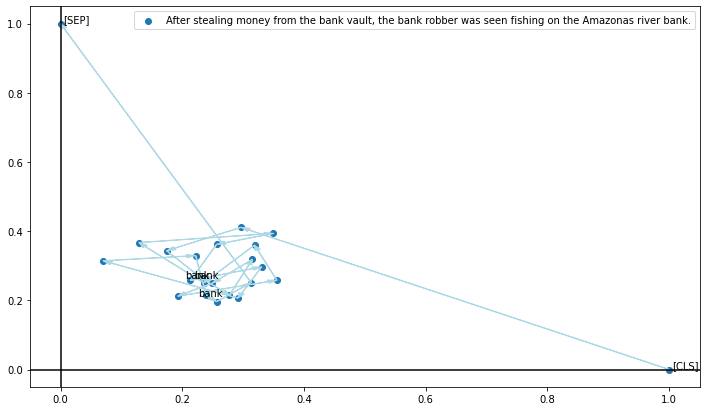

In [75]:
# Aumenta o tamanho da plotagem do gráfico
plt.figure(figsize=(12,7))
plt.axhline(color='black')
plt.axvline(color='black')
plt.scatter(Wp[0,:], Wp[1,:], label=texto)
rX = max(Wp[0,:])-min(Wp[0,:])
rY = max(Wp[1,:])-min(Wp[1,:])
rM = max(rX, rY)
eps = 0.005
for i, token in enumerate(texto_tokenizado):
    if token in ['[CLS]', '[SEP]']:
        plt.annotate(token, (Wp[0,i]+rX*eps, Wp[1,i]+rX*eps))
    if token == 'bank':
        plt.annotate(token, (Wp[0,i]+rX*eps*-6, Wp[1,i]+rX*eps*3))
    if i>0:
        plt.arrow(Wp[0,i-1],Wp[1,i-1], Wp[0,i]-Wp[0,i-1], Wp[1,i]-Wp[1,i-1], color='lightblue', head_length=rM*eps*3, head_width=rM*eps*2, length_includes_head=True)
plt.legend()

# Mostra o gráfico
plt.show()

#### Comparando as orações

Dividindo a frase em três orações.

['[CLS]', 'after', 'stealing', 'money', 'from', 'the', 'bank', 'vault', '[SEP]']
['[CLS]', 'the', 'bank', 'robber', 'was', 'seen', '[SEP]']
['[CLS]', 'fishing', 'on', 'the', 'mississippi', 'river', 'bank', '.', '[SEP]']


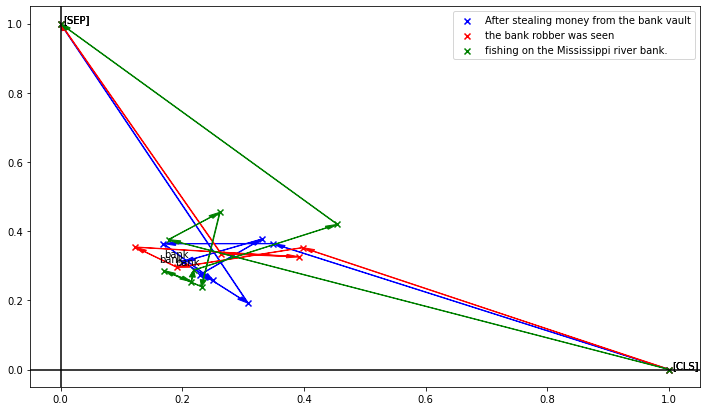

In [76]:
textopt_br = ["Depois de roubar o cofre do banco",
              "o ladrão de banco foi visto",
              "sentado no banco da praça central."]

texto = ["After stealing money from the bank vault",
         "the bank robber was seen",
         "fishing on the Mississippi river bank."]

colors = ['blue', 'red', 'green']

# Aumenta o tamanho da plotagem do gráfico
plt.figure(figsize=(12,7))
plt.axhline(color='black')
plt.axvline(color='black')
for n,frase in enumerate(texto):
    Wp, tokens = getEmbeddingsVisualSomaTodasAsCamadas(frase, model, tokenizer)
    print(tokens)
    plt.scatter(Wp[0,:], Wp[1,:], color=colors[n], marker='x', label=frase)
    rX = max(Wp[0,:])-min(Wp[0,:])
    rY = max(Wp[1,:])-min(Wp[1,:])
    rM = max(rX, rY)
    eps = 0.005
    eps2 = 0.005
    for i, token in enumerate(tokens):
        if token in ['[CLS]', '[SEP]']:
            plt.annotate(token, (Wp[0,i]+rX*eps, Wp[1,i]+rX*eps))
        if token == 'bank':
            plt.annotate(token, (Wp[0,i]+rX*eps*-6, Wp[1,i]+rX*eps*3))
        if i>0:
            plt.arrow(Wp[0,i-1],Wp[1,i-1], Wp[0,i]-Wp[0,i-1], Wp[1,i]-Wp[1,i-1], color=colors[n], head_length=rM*eps2*4, head_width=rM*eps2*2, length_includes_head=True)
plt.legend()

# Mostra o gráfico
plt.show()       

## 7 - Exemplo palavra "embedding" (3 tokens ##)

In [77]:
# Define um sentença de exemplo com diversos significados( da palavra  "embedding"
textopt_br = "Uma palavra pode ser contextualizada ou não contextualizando usando embeddings." \
            "O uso de embeddings expande o uso da linguagem na computação." \
            "A comissão apoia a incorporação das empresas."

texto = "A word can be contextualized or not contextualized using embeddings." \
        "The use of embeddings expands the use of language in computing." \
        "The commission supports the embedding of  companies."

# Adiciona os tokens especiais
texto_marcado = "[CLS] " + texto + " [SEP]"

# Divide a sentença em tokens
texto_tokenizado = tokenizer.tokenize(texto_marcado)

# Mapeia os tokens em seus índices do vocabulário
tokens_indexados = tokenizer.convert_tokens_to_ids(texto_tokenizado)

# Mostra os tokens com seus índices
i = 0
for tup in zip(texto_tokenizado, tokens_indexados):
    print('{:>3} {:<12} {:>6,}'.format(i, tup[0], tup[1]))
    i= i + 1

  0 [CLS]           101
  1 a             1,037
  2 word          2,773
  3 can           2,064
  4 be            2,022
  5 context       6,123
  6 ##ual         8,787
  7 ##ized        3,550
  8 or            2,030
  9 not           2,025
 10 context       6,123
 11 ##ual         8,787
 12 ##ized        3,550
 13 using         2,478
 14 em            7,861
 15 ##bed         8,270
 16 ##ding        4,667
 17 ##s           2,015
 18 .             1,012
 19 the           1,996
 20 use           2,224
 21 of            1,997
 22 em            7,861
 23 ##bed         8,270
 24 ##ding        4,667
 25 ##s           2,015
 26 expands      24,545
 27 the           1,996
 28 use           2,224
 29 of            1,997
 30 language      2,653
 31 in            1,999
 32 computing     9,798
 33 .             1,012
 34 the           1,996
 35 commission    3,222
 36 supports      6,753
 37 the           1,996
 38 em            7,861
 39 ##bed         8,270
 40 ##ding        4,667
 41 of          

O BERT é treinado e espera pares de frases, usando 1s e 0s para distinguir entre as duas frases. Ou seja, para cada token em "texto_tokenizado", devemos especificar a qual frase pertence: sentença 0 (uma série de 0s) ou sentença 1 (uma série de 1s). Para nossos propósitos, as entradas de sentença única requerem apenas uma série de 1s; portanto, criaremos um vetor de 1s para cada token em nossa frase de entrada.

Se você deseja processar duas frases, atribua cada palavra na primeira frase mais o token '[SEP]' a 0 e todos os tokens da segunda frase a 1.

In [78]:
# Marca cada um dos tokens como pertencentes à frase "1", pois só iremos analisar uma.
mascara_atencao = [1] * len(texto_tokenizado)

print (mascara_atencao)
print (len(mascara_atencao))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
45


Converte 'tokens_indexados' e 'semegmentos_ids' em  listas em tensores.

In [79]:
# Importa a bibliteca
import torch

# Converte as entradas de listas para tensores do torch
tokens_tensores = torch.as_tensor([tokens_indexados])
mascara_atencao_tensores = torch.as_tensor([mascara_atencao])

Gera os embeddings para a frase e retorna a saída em  `outputs`.


In [80]:
# Prediz os atributos dos estados ocultos para cada camada
with torch.no_grad():    
  
    # Retorno de model quando ´last_hidden_state=True´ é setado:    
    #outputs[0] = last_hidden_state, outputs[1] = pooler_output, outputs[2] = hidden_states
    outputs = model(tokens_tensores, mascara_atencao_tensores)

Recupera a última camada.

In [81]:
# Recupera a última camada oculta da saída
last_hidden_states = outputs[0]

print ("O vetor da última camada oculta tem o formato:", last_hidden_states.size())

O vetor da última camada oculta tem o formato: torch.Size([1, 45, 1024])


Plota a distribuição dos valores dos embeddings de 3 tokens como um histograma.

('em', 7861)
('##bed', 8270)
('##ding', 4667)


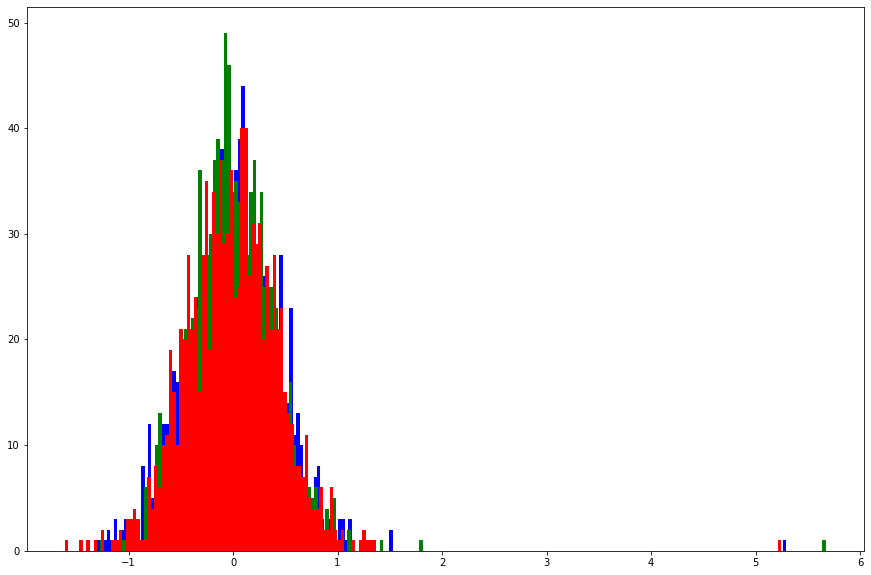

In [82]:
# Import da biblioteca gráfica
import matplotlib.pyplot as plt
%matplotlib inline

# Plota os tokens da sentença
token_i = 14
layer_i = 0

# Recupera o vetor de embeddings da última camada para o token
vec = last_hidden_states[layer_i][token_i]

# Mostra a palavra do token_i
print((texto_tokenizado[token_i], tokens_indexados[token_i]))

# Aumenta o tamanho da plotagem do gráfico
plt.figure(figsize=(15,10))

# Cria o histograma com 200 classes
plt.hist(vec, bins=200, color='blue')

# Plota os tokens da sentença
token_i = 15
layer_i = 0

# Recupera o vetor de embeddings da última camada para o token
vec = last_hidden_states[layer_i][token_i]

# Mostra a palavra do token_i
print((texto_tokenizado[token_i], tokens_indexados[token_i]))

# Aumenta o tamanho da plotagem do gráfico
plt.hist(vec, bins=200, color='green')

# Plota os tokens da sentença
token_i = 16
layer_i = 0

# Recupera o vetor de embeddings da última camada para o token
vec = last_hidden_states[layer_i][token_i]

# Mostra a palavra do token_i
print((texto_tokenizado[token_i], tokens_indexados[token_i]))

# Cria o histograma com 200 classes
plt.hist(vec, bins=200, color='red')

# Mostra o gráfico
plt.show()

Vamos nos livrar da dimensão lotes "batches", pois não precisamos dela.

In [83]:
print ("O vetor da última camada oculta tem o formato:", last_hidden_states.size())

# Remove a dimensão 1, o lote "batches".
# O método ´squeeze´ remove a primeira dimensão(0) pois possui tamanho 1
token_embeddings = torch.squeeze(last_hidden_states, dim=0)

print ("O vetor de tokens de embedding da senteça tem o formato:", token_embeddings.size())

O vetor da última camada oculta tem o formato: torch.Size([1, 45, 1024])
O vetor de tokens de embedding da senteça tem o formato: torch.Size([45, 1024])


Confirmando vetores dependentes do contexto


In [84]:
for i, token_str in enumerate(texto_tokenizado):
  print (i, token_str)

0 [CLS]
1 a
2 word
3 can
4 be
5 context
6 ##ual
7 ##ized
8 or
9 not
10 context
11 ##ual
12 ##ized
13 using
14 em
15 ##bed
16 ##ding
17 ##s
18 .
19 the
20 use
21 of
22 em
23 ##bed
24 ##ding
25 ##s
26 expands
27 the
28 use
29 of
30 language
31 in
32 computing
33 .
34 the
35 commission
36 supports
37 the
38 em
39 ##bed
40 ##ding
41 of
42 companies
43 .
44 [SEP]


Concatenando as subpalavras

In [85]:
#Indíce início e fim do token
tokenInicio = 14
tokenFim = 16

#Inicia com o primeiro token.
token_unificado = texto_tokenizado[tokenInicio]

# Seleciona o restante dos tokens e junta com espaços.
for i in range(tokenInicio + 1, tokenFim + 1):
    
    # Se for um token de subpalavra, combina com o token anterior.
    if texto_tokenizado[i][0:2] == '##':
        token_unificado += texto_tokenizado[i][2:]
    
    # Caso contrário adiciona um espaço ao token.
    else:
        token_unificado += ' ' + texto_tokenizado[i]

print('token: "' + token_unificado + '"')

token: "embedding"


In [86]:
print(texto_tokenizado[14], str(token_embeddings[4][:5]))
print(texto_tokenizado[15], str(token_embeddings[4][:5]))
print(texto_tokenizado[16], str(token_embeddings[4][:5]))

em tensor([-0.0361, -1.3936, -0.7377,  0.1916,  0.1901])
##bed tensor([-0.0361, -1.3936, -0.7377,  0.1916,  0.1901])
##ding tensor([-0.0361, -1.3936, -0.7377,  0.1916,  0.1901])


Exibe os embenddings das palavras

A letter aparece nos índices 14, 22 e 38.


In [87]:
# Índice das palavras a serem comparadas
palavra1 = 14
palavra2 = 22
palavra3 = 38

print('Os primeiros 5 valores de cada instância de "embedding".')
print('Primeira ocorrência:')
print(texto_tokenizado[palavra1], str(token_embeddings[palavra1][:5]))
print(texto_tokenizado[palavra1+1], str(token_embeddings[palavra1+1][:5]))
print(texto_tokenizado[palavra1+2], str(token_embeddings[palavra1+2][:5]))

print('\nSegunda ocorrência:')
print(texto_tokenizado[palavra2], str(token_embeddings[palavra2][:5]))
print(texto_tokenizado[palavra2+1], str(token_embeddings[palavra2+1][:5]))
print(texto_tokenizado[palavra2+2], str(token_embeddings[palavra2+2][:5]))

print('\nTerceira ocorrência:')
print(texto_tokenizado[palavra3], str(token_embeddings[palavra3][:5]))
print(texto_tokenizado[palavra3+1], str(token_embeddings[palavra3+1][:5]))
print(texto_tokenizado[palavra3+2], str(token_embeddings[palavra3+2][:5]))


Os primeiros 5 valores de cada instância de "embedding".
Primeira ocorrência:
em tensor([-0.9927, -0.0458, -0.5320, -0.7997, -0.4275])
##bed tensor([-0.0803, -0.5647, -0.2167, -0.3267,  0.2514])
##ding tensor([-0.7342, -0.4752, -0.2634, -0.0746, -0.0647])

Segunda ocorrência:
em tensor([-1.4474, -0.5326, -0.5481, -0.5629, -0.1175])
##bed tensor([-0.4111, -0.7831, -0.0166, -0.2769,  0.4590])
##ding tensor([-0.7655, -0.6910, -0.3633, -0.0998,  0.1103])

Terceira ocorrência:
em tensor([-1.2394, -0.7792, -0.3866, -0.4078, -0.2815])
##bed tensor([ 0.0018, -0.5129,  0.1483,  0.0428,  0.5552])
##ding tensor([-0.5821, -0.5726,  0.1456,  0.1368, -0.0397])


### Comparando as palavras das frases 1 token

Podemos ver que os valores diferem, mas vamos calcular a semelhança de cosseno entre os vetores para fazer uma comparação mais precisa.

In [88]:
from scipy.spatial.distance import cosine

print("Período:", texto)
print("Palavra1=", palavra1, "=", texto_tokenizado[palavra1], "(embedding)")
print("Palavra2=", palavra2, "=", texto_tokenizado[palavra2], "(embedding)")
print("Palavra3=", palavra3, "=", texto_tokenizado[palavra3], "(incorporação)")

# Calcula a similaridade de coseno entre as palavras embedding
# Em "embedding" versus "incorporaçao" (diferentes significados).
diferente1 = 1 - cosine(token_embeddings[palavra2][:5], token_embeddings[palavra3][:5])

print('Vetor de similaridade para diferentes significados(',palavra2,',',palavra3,'):  %.2f' % diferente1)

# Calcula a similaridade de coseno entre as palavras embedding
# Em "embedding" versus "embedding" (mesmo significado).
mesmo = 1 - cosine(token_embeddings[palavra2][:5], token_embeddings[palavra1][:5])

print('Vetor de similaridade para mesmo significado(',palavra2,',',palavra1,')      :  %.2f' % mesmo)

# Calcula a similaridade de coseno entre as palavras embedding
# Em "embedding" incorporação" (diferente significados).
diferente2 = 1 - cosine(token_embeddings[palavra1][:5], token_embeddings[palavra3][:5])

print('Vetor de similaridade para diferentes significados(',palavra1,',',palavra3,'):  %.2f' % diferente2)

Período: A word can be contextualized or not contextualized using embeddings.The use of embeddings expands the use of language in computing.The commission supports the embedding of  companies.
Palavra1= 14 = em (embedding)
Palavra2= 22 = em (embedding)
Palavra3= 38 = em (incorporação)
Vetor de similaridade para diferentes significados( 22 , 38 ):  0.97
Vetor de similaridade para mesmo significado( 22 , 14 )      :  0.90
Vetor de similaridade para diferentes significados( 14 , 38 ):  0.83


### Comparando as palavras das frases 2 tokens

Podemos ver que os valores diferem, mas vamos calcular a semelhança de cosseno entre os vetores para fazer uma comparação mais precisa.

Calcula a média dos embeddings dos tokens que forma a palavra.

In [89]:
from scipy.spatial.distance import cosine

print("Período:", texto)
print("Palavra1=", palavra1, " e ", palavra1 + 1, "=", texto_tokenizado[palavra1], texto_tokenizado[palavra1+1], "(embedding)")
print("Palavra2=", palavra2, " e ", palavra2 + 1, "=", texto_tokenizado[palavra2], texto_tokenizado[palavra2+1], "(embedding)")
print("Palavra3=", palavra3, " e ", palavra3 + 1, "=", texto_tokenizado[palavra3], texto_tokenizado[palavra3+1], "(incorporação)")

# Calcula a similaridade de coseno entre as palavras embedding
# Em "embedding" versus "incorporaçao" (diferentes significados).
#diferente1 = 1 - cosine(token_embeddings[palavra2:palavra2+1][:5], token_embeddings[palavra3:palavra3+1][:5])
diferente1 = 1 - cosine(
                        (token_embeddings[palavra2][:5]+token_embeddings[palavra2+1][:5])/2, 
                        (token_embeddings[palavra3][:5]+token_embeddings[palavra3+1][:5])/2
                        )

print('Vetor de similaridade para diferentes significados(',palavra2,'e', palavra2+1,',',palavra3,'e',palavra3+1,'):  %.2f' % diferente1)

# Calcula a similaridade de coseno entre as palavras embedding
# Em "embedding" versus "embedding" (mesmo significado).
#mesmo = 1 - cosine(token_embeddings[palavra2:palavra2+1][:5], token_embeddings[palavra1:palavra1+1][:5])
mesmo = 1 - cosine(
                        (token_embeddings[palavra2][:5]+token_embeddings[palavra2+1][:5])/2, 
                        (token_embeddings[palavra1][:5]+token_embeddings[palavra1+1][:5])/2
                  )


print('Vetor de similaridade para mesmo significado(',palavra2,'e', palavra2+1,',',palavra1,'e',palavra1+1,')      :  %.2f' % mesmo)

# Calcula a similaridade de coseno entre as palavras embedding
# Em "embedding" incorporação" (diferente significados).
#diferente2 = 1 - cosine(token_embeddings[palavra1:palavra1+1][:5], token_embeddings[palavra3:palavra3+1][:5])
diferente2 = 1 - cosine(
                        (token_embeddings[palavra1][:5]+token_embeddings[palavra1+1][:5])/2, 
                        (token_embeddings[palavra3][:5]+token_embeddings[palavra3+1][:5])/2
                        )

print('Vetor de similaridade para diferentes significados(',palavra1,'e', palavra1+1,',',palavra3,'e',palavra3+1,'):  %.2f' % diferente2)

Período: A word can be contextualized or not contextualized using embeddings.The use of embeddings expands the use of language in computing.The commission supports the embedding of  companies.
Palavra1= 14  e  15 = em ##bed (embedding)
Palavra2= 22  e  23 = em ##bed (embedding)
Palavra3= 38  e  39 = em ##bed (incorporação)
Vetor de similaridade para diferentes significados( 22 e 23 , 38 e 39 ):  0.97
Vetor de similaridade para mesmo significado( 22 e 23 , 14 e 15 )      :  0.89
Vetor de similaridade para diferentes significados( 14 e 15 , 38 e 39 ):  0.78


### Comparando as palavras das frases 3 tokens

Podemos ver que os valores diferem, mas vamos calcular a semelhança de cosseno entre os vetores para fazer uma comparação mais precisa.

Calcula a média dos embeddings dos tokens que forma a palavra.

In [90]:
from scipy.spatial.distance import cosine

print("Período:", texto)
print("Palavra1=", palavra1, " e ", palavra1 + 1, " e ", palavra1 + 2, "=", texto_tokenizado[palavra1], texto_tokenizado[palavra1+1], texto_tokenizado[palavra1+2], "(embedding)")
print("Palavra2=", palavra2, " e ", palavra2 + 1, " e ", palavra2 + 2, "=", texto_tokenizado[palavra2], texto_tokenizado[palavra2+1], texto_tokenizado[palavra2+2], "(embedding)")
print("Palavra3=", palavra3, " e ", palavra3 + 1, " e ", palavra3 + 2, "=", texto_tokenizado[palavra3], texto_tokenizado[palavra3+1], texto_tokenizado[palavra2+2], "(incorporação)")

# Calcula a similaridade de coseno entre as palavras embedding
# Em "embedding" versus "incorporaçao" (diferentes significados).
diferente1 = 1 - cosine((token_embeddings[palavra2][:5] +
                         token_embeddings[palavra2+1][:5]+
                         token_embeddings[palavra2+2][:5])/2, 
                        (token_embeddings[palavra3][:5]+ 
                         token_embeddings[palavra3+1][:5]+
                         token_embeddings[palavra3+2][:5])/2)

print('Vetor de similaridade para diferentes significados(',palavra2,'e', palavra2+1,'e',palavra2+2,',',palavra3,'e',palavra3+1,'e',palavra3+2,')  :  %.2f' % diferente1)

# Calcula a similaridade de coseno entre as palavras embedding
# Em "embedding" versus "embedding" (mesmo significado).
mesmo = 1 - cosine((token_embeddings[palavra2][:5] +
                         token_embeddings[palavra2+1][:5]+
                         token_embeddings[palavra2+2][:5])/2, 
                        (token_embeddings[palavra1][:5]+ 
                         token_embeddings[palavra1+1][:5]+
                         token_embeddings[palavra1+2][:5])/2)

print('Vetor de similaridade para diferentes significados(',palavra2,'e', palavra2+1,'e',palavra2+2,',',palavra1,'e',palavra1+1,'e',palavra2+2,')  :  %.2f' % mesmo)

# Calcula a similaridade de coseno entre as palavras embedding
# Em "embedding" incorporação" (diferente significados).
#diferente2 = 1 - cosine(token_embeddings[palavra1:palavra1+2][:5], token_embeddings[palavra3:palavra3+2][:5])
diferente2 = 1 - cosine((token_embeddings[palavra1][:5] +
                         token_embeddings[palavra1+1][:5]+
                         token_embeddings[palavra1+2][:5])/2, 
                        (token_embeddings[palavra3][:5]+ 
                         token_embeddings[palavra3+1][:5]+
                         token_embeddings[palavra3+2][:5])/2)

print('Vetor de similaridade para diferentes significados(',palavra1,'e', palavra1+1,'e',palavra1+2,',',palavra3,'e',palavra3+1,'e',palavra3+2,')  :  %.2f' % diferente2)

Período: A word can be contextualized or not contextualized using embeddings.The use of embeddings expands the use of language in computing.The commission supports the embedding of  companies.
Palavra1= 14  e  15  e  16 = em ##bed ##ding (embedding)
Palavra2= 22  e  23  e  24 = em ##bed ##ding (embedding)
Palavra3= 38  e  39  e  40 = em ##bed ##ding (incorporação)
Vetor de similaridade para diferentes significados( 22 e 23 e 24 , 38 e 39 e 40 )  :  0.95
Vetor de similaridade para diferentes significados( 22 e 23 e 24 , 14 e 15 e 24 )  :  0.94
Vetor de similaridade para diferentes significados( 14 e 15 e 16 , 38 e 39 e 40 )  :  0.81


### Visualizando a Frase

Aqui, queremos mostrar a conexão entre os tokens de uma frase usando a incorporação do BERT. Plotamos as inserções dos tokens em um subespaço, onde (0,1) e (1,0) são os marcadores de partida [CLS] e [SEP] e marcadores finais e finais da frase.

In [91]:
# Import das bibliotecas
import numpy as np
import torch

import matplotlib.pyplot as plt
%matplotlib inline

Transforma  o vetor de embendings em um array.

In [92]:
# Transforma tokens embeddings em um array
embeddings = token_embeddings.numpy()

Base selecionada para que o [CLS] e o [SEP] passem para (0,1) e (1,0)

In [93]:
# Converte para um array
W = np.array(embeddings)
# Transforma em um array
B = np.array([embeddings[0], embeddings[-1]])
# Inverte B.T
Bi = np.linalg.pinv(B.T)

Projeta os tokens da palavra no subespaço

In [94]:
Wp = np.matmul(Bi,W.T)

Plota o gráfico da frase

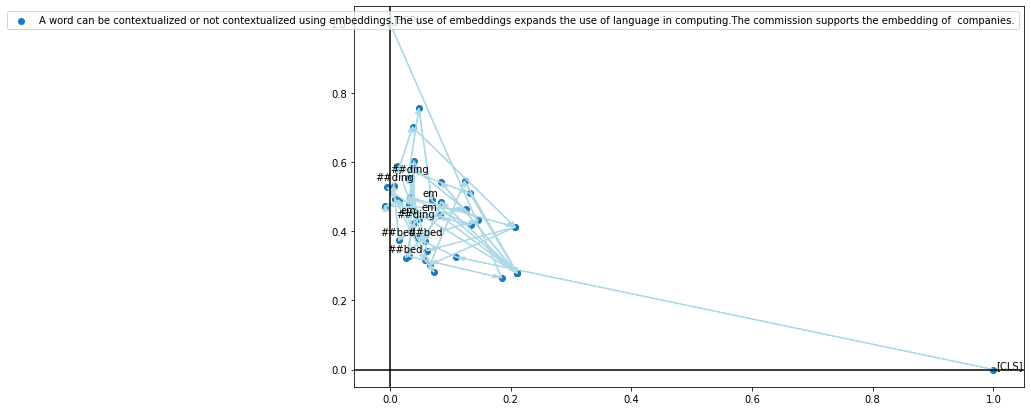

In [95]:
# Aumenta o tamanho da plotagem do gráfico
plt.figure(figsize=(12,7))
plt.axhline(color='black')
plt.axvline(color='black')
plt.scatter(Wp[0,:], Wp[1,:], label=texto)
rX = max(Wp[0,:])-min(Wp[0,:])
rY = max(Wp[1,:])-min(Wp[1,:])
rM = max(rX, rY)
eps = 0.005
for i, token in enumerate(texto_tokenizado):
    if token in ['[CLS]', '[SEP]']:
        plt.annotate(token, (Wp[0,i]+rX*eps, Wp[1,i]+rX*eps))
    if token in ['em', '##bed', '##ding' ]:
        plt.annotate(token, (Wp[0,i]+rX*eps*-6, Wp[1,i]+rX*eps*3))
    if i>0:
        plt.arrow(Wp[0,i-1],Wp[1,i-1], Wp[0,i]-Wp[0,i-1], Wp[1,i]-Wp[1,i-1], color='lightblue', head_length=rM*eps*3, head_width=rM*eps*2, length_includes_head=True)
plt.legend()

# Mostra o gráfico
plt.show()

### Comparando as frases

Dividindo o texto em três frases.

['[CLS]', 'a', 'word', 'can', 'be', 'context', '##ual', '##ized', 'or', 'not', 'context', '##ual', '##ized', 'using', 'em', '##bed', '##ding', '##s', '.', '[SEP]']
['[CLS]', 'the', 'use', 'of', 'em', '##bed', '##ding', '##s', 'expands', 'the', 'use', 'of', 'language', 'in', 'computing', '.', '[SEP]']
['[CLS]', 'the', 'commission', 'supports', 'the', 'em', '##bed', '##ding', 'of', 'companies', '.', '[SEP]']


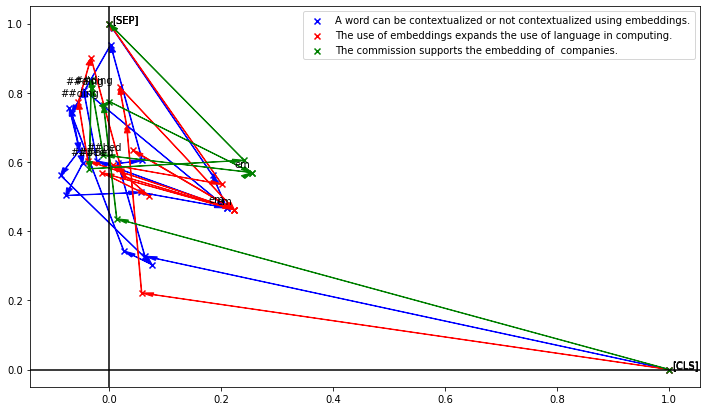

In [96]:
textopt_br = ["Uma palavra pode ser contextualizada ou não contextualizando usando embeddings.",
            "O uso de embeddings expande o uso da linguagem na computação.",
            "A comissão apoia a incorporação das empresas."]

texto = ["A word can be contextualized or not contextualized using embeddings.",
        "The use of embeddings expands the use of language in computing.",
        "The commission supports the embedding of  companies."]

colors = ['blue', 'red', 'green']

# Aumenta o tamanho da plotagem do gráfico
plt.figure(figsize=(12,7))
plt.axhline(color='black')
plt.axvline(color='black')
for n,frase in enumerate(texto):
    Wp, tokens = getEmbeddingsVisualUltimaCamada(frase, model, tokenizer)
    print(tokens)    
    plt.scatter(Wp[0,:], Wp[1,:], color=colors[n], marker='x', label=frase)
    rX = max(Wp[0,:])-min(Wp[0,:])
    rY = max(Wp[1,:])-min(Wp[1,:])
    rM = max(rX, rY)
    eps = 0.005
    eps2 = 0.005
    for i, token in enumerate(tokens):
        if token in ['[CLS]', '[SEP]']:
            plt.annotate(token, (Wp[0,i]+rX*eps, Wp[1,i]+rX*eps))
        if token in ['em', '##bed', '##ding' ]:
            plt.annotate(token, (Wp[0,i]+rX*eps*-6, Wp[1,i]+rX*eps*3))
        if i>0:
            plt.arrow(Wp[0,i-1],Wp[1,i-1], Wp[0,i]-Wp[0,i-1], Wp[1,i]-Wp[1,i-1], color=colors[n], head_length=rM*eps2*4, head_width=rM*eps2*2, length_includes_head=True)
plt.legend()

# Mostra o gráfico
plt.show()       

## 8 - Exemplo palavra "letter"

In [97]:
# Define um sentença de exemplo com diversos significados( da palavra  "letter"
textopt_br = "O A é a primeira letra do alfabeto." \
            "Nome próprio possui primeira letra em maiúsculo." \
            "Eu escrevi uma carta para a minha mãe neste final de semana."

texto = "The A is the first letter of the alphabet." \
        "First name has first letter in capital." \
        "I wrote a letter to my mother this weekend."

# Adiciona os tokens especiais
texto_marcado = "[CLS] " + texto + " [SEP]"

# Divide a sentença em tokens
texto_tokenizado = tokenizer.tokenize(texto_marcado)

# Mapeia os tokens em seus índices do vocabulário
tokens_indexados = tokenizer.convert_tokens_to_ids(texto_tokenizado)

# Mostra os tokens com seus índices
i = 0
for tup in zip(texto_tokenizado, tokens_indexados):
    print('{:>3} {:<12} {:>6,}'.format(i, tup[0], tup[1]))
    i= i + 1

  0 [CLS]           101
  1 the           1,996
  2 a             1,037
  3 is            2,003
  4 the           1,996
  5 first         2,034
  6 letter        3,661
  7 of            1,997
  8 the           1,996
  9 alphabet     12,440
 10 .             1,012
 11 first         2,034
 12 name          2,171
 13 has           2,038
 14 first         2,034
 15 letter        3,661
 16 in            1,999
 17 capital       3,007
 18 .             1,012
 19 i             1,045
 20 wrote         2,626
 21 a             1,037
 22 letter        3,661
 23 to            2,000
 24 my            2,026
 25 mother        2,388
 26 this          2,023
 27 weekend       5,353
 28 .             1,012
 29 [SEP]           102


O BERT é treinado e espera pares de frases, usando 1s e 0s para distinguir entre as duas frases. Ou seja, para cada token em "texto_tokenizado", devemos especificar a qual frase pertence: sentença 0 (uma série de 0s) ou sentença 1 (uma série de 1s). Para nossos propósitos, as entradas de sentença única requerem apenas uma série de 1s; portanto, criaremos um vetor de 1s para cada token em nossa frase de entrada.

Se você deseja processar duas frases, atribua cada palavra na primeira frase mais o token '[SEP]' a 0 e todos os tokens da segunda frase a 1.

In [98]:
# Marca cada um dos tokens como pertencentes à frase "1", pois só iremos analisar uma.
mascara_atencao = [1] * len(texto_tokenizado)

print (mascara_atencao)
print (len(mascara_atencao))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
30


Converte 'tokens_indexados' e 'semegmentos_ids' em  listas em tensores.

In [99]:
# Importa a bibliteca
import torch

# Converte as entradas de listas para tensores do torch
tokens_tensores = torch.as_tensor([tokens_indexados])
mascara_atencao_tensores = torch.as_tensor([mascara_atencao])

Gera os embeddings para a frase e retorna a saída em  `outputs`.


In [100]:
# Prediz os atributos dos estados ocultos para cada camada
with torch.no_grad():    
  
    # Retorno de model quando ´last_hidden_state=True´ é setado:    
    #outputs[0] = last_hidden_state, outputs[1] = pooler_output, outputs[2] = hidden_states
    outputs = model(tokens_tensores, mascara_atencao_tensores)

Recupera a última camada.

In [101]:
# Recupera a última camada oculta da saída
last_hidden_states = outputs[0]

print ("O vetor da última camada oculta tem o formato:", last_hidden_states.size())

O vetor da última camada oculta tem o formato: torch.Size([1, 30, 1024])


Intervalo de valores para uma determinada camada e token.

('letter', 3661)


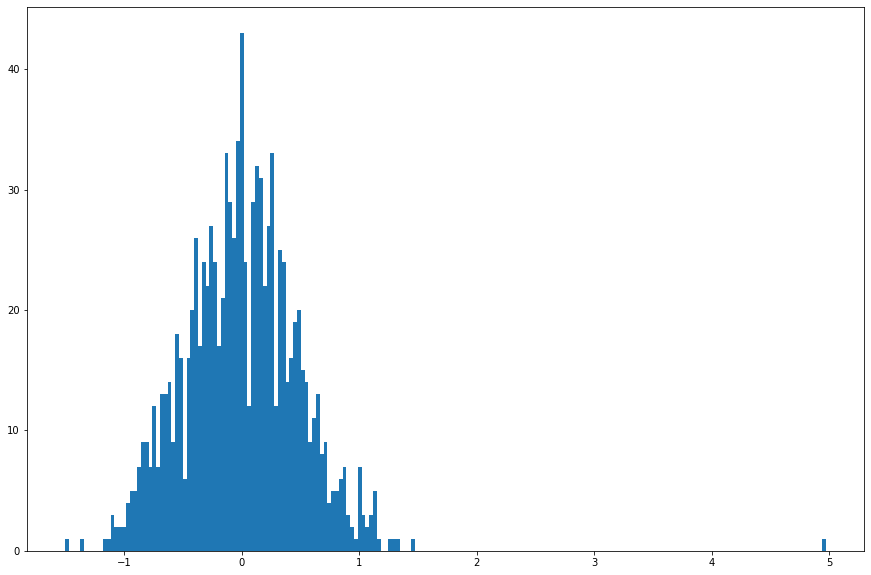

In [102]:
# Import da biblioteca gráfica
import matplotlib.pyplot as plt
%matplotlib inline

# Plota os tokens da sentença
token_i = 6
layer_i = 0

# Recupera o vetor de embeddings da última camada para o token
vec = last_hidden_states[layer_i][token_i]

# Mostra a palavra do token_i
print((texto_tokenizado[token_i], tokens_indexados[token_i]))

# Aumenta o tamanho da plotagem do gráfico
plt.figure(figsize=(15,10))

# Cria o histograma com 200 classes
plt.hist(vec, bins=200)

# Mostra o gráfico
plt.show()

Vamos nos livrar da dimensão lotes "batches", pois não precisamos dela.

In [103]:
print ("O vetor da última camada oculta tem o formato:", last_hidden_states.size())

# Remove a dimensão 1, o lote "batches".
# O método ´squeeze´ remove a primeira dimensão(0) pois possui tamanho 1
token_embeddings = torch.squeeze(last_hidden_states, dim=0)

print ("O vetor de tokens de embedding da senteça tem o formato:", token_embeddings.size())

O vetor da última camada oculta tem o formato: torch.Size([1, 30, 1024])
O vetor de tokens de embedding da senteça tem o formato: torch.Size([30, 1024])


Confirmando vetores dependentes do contexto


In [104]:
for i, token_str in enumerate(texto_tokenizado):
  print (i, token_str)

0 [CLS]
1 the
2 a
3 is
4 the
5 first
6 letter
7 of
8 the
9 alphabet
10 .
11 first
12 name
13 has
14 first
15 letter
16 in
17 capital
18 .
19 i
20 wrote
21 a
22 letter
23 to
24 my
25 mother
26 this
27 weekend
28 .
29 [SEP]


Exibe os embenddings das palavras

A bank aparece nos índices 6, 15 e 22.


In [105]:
# Índice das palavras a serem comparadas
palavra1 = 6
palavra2 = 15
palavra3 = 22

print('Os primeiros 5 valores de cada instância de "letter".')
print('')
print(texto_tokenizado[palavra1], str(token_embeddings[palavra1][:5]))
print(texto_tokenizado[palavra2], str(token_embeddings[palavra2][:5]))
print(texto_tokenizado[palavra3], str(token_embeddings[palavra3][:5]))

Os primeiros 5 valores de cada instância de "letter".

letter tensor([-0.2523, -0.0994,  0.3474, -0.7908, -0.7231])
letter tensor([-0.2816, -0.1069,  0.1347, -0.5971, -0.4354])
letter tensor([-0.8484, -0.3777, -0.0684,  0.0664, -0.3315])


### Comparando as palavras das frases
Podemos ver que os valores diferem, mas vamos calcular a semelhança de cosseno entre os vetores para fazer uma comparação mais precisa.

In [106]:
from scipy.spatial.distance import cosine

print("Período:", texto)
print("Palavra1=", palavra1, "=", texto_tokenizado[palavra1], "(letra)")
print("Palavra2=", palavra2, "=", texto_tokenizado[palavra2], "(letra)")
print("Palavra3=", palavra3, "=", texto_tokenizado[palavra3], "(carta)")

# Calcula a similaridade de coseno entre as palavras letter
# Em "first letter capital" versus "wrote a letter" (diferentes significados).
diferente1 = 1 - cosine(token_embeddings[palavra2][:5], token_embeddings[palavra3][:5])

print('Vetor de similaridade para diferentes significados(',palavra2,',',palavra3,'):  %.2f' % diferente1)

# Calcula a similaridade de coseno entre as palavras letter
# Em "first letter capital" versus "first letter alphabet" (mesmo significado).
mesmo = 1 - cosine(token_embeddings[palavra2][:5], token_embeddings[palavra1][:5])

print('Vetor de similaridade para mesmo significado(',palavra2,',',palavra1,'):  %.2f' % mesmo)

# Calcula a similaridade de coseno entre as palavras letter
# Em "first letter alphabet" versus "wrote a leter" (diferente significados).
diferente2 = 1 - cosine(token_embeddings[palavra1][:5], token_embeddings[palavra3][:5])

print('Vetor de similaridade para diferentes significados(',palavra1,',',palavra3,'):  %.2f' % diferente2)

Período: The A is the first letter of the alphabet.First name has first letter in capital.I wrote a letter to my mother this weekend.
Palavra1= 6 = letter (letra)
Palavra2= 15 = letter (letra)
Palavra3= 22 = letter (carta)
Vetor de similaridade para diferentes significados( 15 , 22 ):  0.47
Vetor de similaridade para mesmo significado( 15 , 6 ):  0.98
Vetor de similaridade para diferentes significados( 6 , 22 ):  0.36


### Visualizando a Frase

Aqui, queremos mostrar a conexão entre os tokens de uma frase usando a incorporação do BERT. Plotamos as inserções dos tokens em um subespaço, onde (0,1) e (1,0) são os marcadores de partida [CLS] e [SEP] e marcadores finais e finais da frase.

In [107]:
# Import das bibliotecas
import numpy as np
import torch

import matplotlib.pyplot as plt
%matplotlib inline

Transforma  o vetor de embendings em um array.

In [108]:
# Transforma tokens embeddings em um array
embeddings = token_embeddings.numpy()

Base selecionada para que o [CLS] e o [SEP] passem para (0,1) e (1,0)

In [109]:
# Converte para um array
W = np.array(embeddings)
# Transforma em um array
B = np.array([embeddings[0], embeddings[-1]])
# Inverte B.T
Bi = np.linalg.pinv(B.T)

Projeta os tokens da palavra no subespaço

In [110]:
Wp = np.matmul(Bi,W.T)

Plota o gráfico da frase

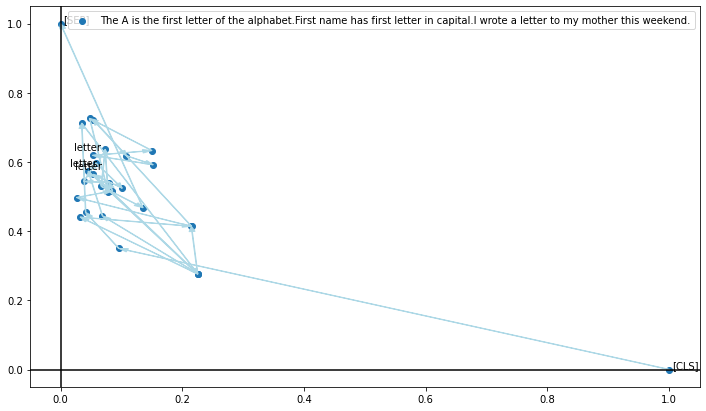

In [111]:
# Aumenta o tamanho da plotagem do gráfico
plt.figure(figsize=(12,7))
plt.axhline(color='black')
plt.axvline(color='black')
plt.scatter(Wp[0,:], Wp[1,:], label=texto)
rX = max(Wp[0,:])-min(Wp[0,:])
rY = max(Wp[1,:])-min(Wp[1,:])
rM = max(rX, rY)
eps = 0.005
for i, token in enumerate(texto_tokenizado):
    if token in ['[CLS]', '[SEP]']:
        plt.annotate(token, (Wp[0,i]+rX*eps, Wp[1,i]+rX*eps))
    if token == 'letter':
        plt.annotate(token, (Wp[0,i]+rX*eps*-6, Wp[1,i]+rX*eps*3))
    if i>0:
        plt.arrow(Wp[0,i-1],Wp[1,i-1], Wp[0,i]-Wp[0,i-1], Wp[1,i]-Wp[1,i-1], color='lightblue', head_length=rM*eps*3, head_width=rM*eps*2, length_includes_head=True)
plt.legend()

# Mostra o gráfico
plt.show()

### Comparando as frases

Dividindo o texto em três frases.

['[CLS]', 'the', 'a', 'is', 'the', 'first', 'letter', 'of', 'the', 'alphabet', '.', '[SEP]']
['[CLS]', 'first', 'name', 'has', 'first', 'letter', 'in', 'capital', '.', '[SEP]']
['[CLS]', 'i', 'wrote', 'a', 'letter', 'to', 'my', 'mother', 'this', 'weekend', '.', '[SEP]']


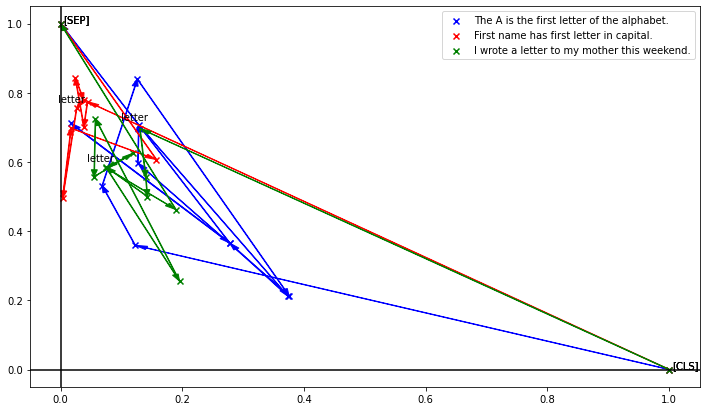

In [112]:
textopt_br = ["O A é a primeira letra do alfabeto.","Nome próprio possui primeira letra em maiúsculo.","Eu escrevi uma carta para a minha mãe neste final de semana."]
texto = ["The A is the first letter of the alphabet.","First name has first letter in capital.","I wrote a letter to my mother this weekend."]

colors = ['blue', 'red', 'green']

# Aumenta o tamanho da plotagem do gráfico
plt.figure(figsize=(12,7))
plt.axhline(color='black')
plt.axvline(color='black')
for n,frase in enumerate(texto):
    Wp, tokens = getEmbeddingsVisualUltimaCamada(frase, model, tokenizer)
    print(tokens)    
    plt.scatter(Wp[0,:], Wp[1,:], color=colors[n], marker='x', label=frase)
    rX = max(Wp[0,:])-min(Wp[0,:])
    rY = max(Wp[1,:])-min(Wp[1,:])
    rM = max(rX, rY)
    eps = 0.005
    eps2 = 0.005
    for i, token in enumerate(tokens):
        if token in ['[CLS]', '[SEP]']:
            plt.annotate(token, (Wp[0,i]+rX*eps, Wp[1,i]+rX*eps))
        if token == 'letter':
            plt.annotate(token, (Wp[0,i]+rX*eps*-6, Wp[1,i]+rX*eps*3))
        if i>0:
            plt.arrow(Wp[0,i-1],Wp[1,i-1], Wp[0,i]-Wp[0,i-1], Wp[1,i]-Wp[1,i-1], color=colors[n], head_length=rM*eps2*4, head_width=rM*eps2*2, length_includes_head=True)
plt.legend()

# Mostra o gráfico
plt.show()       

## 9 - Exemplo palavra "bass"

Outro exemplo

In [113]:
# Define um sentença de exemplo com diversos significados( da palavra "bass""
textopt_br = "Robalo fresco é uma grande iguaria." \
             "Pesquei um robalo no rio ontem." \
             "Eu toco baixo em uma banda de jazz."
             
texto = "Fresh sea bass is a great delicacy." \
        "I fished for a bass in the river yesterday." \
        "I play bass in a jazz band."

# Adiciona os tokens especiais
texto_marcado = "[CLS] " + texto + " [SEP]"

# Divide a sentença em tokens
texto_tokenizado = tokenizer.tokenize(texto_marcado)

# Mapeia os tokens em seus índices do vocabulário
tokens_indexados = tokenizer.convert_tokens_to_ids(texto_tokenizado)

# Mostra os tokens com seus índices
i = 0
for tup in zip(texto_tokenizado, tokens_indexados):
    print('{:>3} {:<12} {:>6,}'.format(i, tup[0], tup[1]))
    i= i + 1

  0 [CLS]           101
  1 fresh         4,840
  2 sea           2,712
  3 bass          3,321
  4 is            2,003
  5 a             1,037
  6 great         2,307
  7 del           3,972
  8 ##ica         5,555
  9 ##cy          5,666
 10 .             1,012
 11 i             1,045
 12 fished       26,281
 13 for           2,005
 14 a             1,037
 15 bass          3,321
 16 in            1,999
 17 the           1,996
 18 river         2,314
 19 yesterday     7,483
 20 .             1,012
 21 i             1,045
 22 play          2,377
 23 bass          3,321
 24 in            1,999
 25 a             1,037
 26 jazz          4,166
 27 band          2,316
 28 .             1,012
 29 [SEP]           102


Máscara de atenção das palavras

In [114]:
# Marca cada um dos tokens como pertencentes à frase "1".
mascara_atencao = [1] * len(texto_tokenizado)

print (mascara_atencao)
print (len(mascara_atencao))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
30


Convertendo as listas em tensores

In [115]:
# Importa a bibliteca
import torch

# Converte as entradas de listas para tensores do torch
tokens_tensores = torch.as_tensor([tokens_indexados])
mascara_atencao_tensores = torch.as_tensor([mascara_atencao])

Gera os embeddings para a frase. Guarda somente a última camada da rede em `outputs`.


In [116]:
# Prediz os atributos dos estados ocultos para cada camada
with torch.no_grad():
    #output[0] contém last_hidden_states
    outputs = model(tokens_tensores, mascara_atencao_tensores)

Recupera a saída

In [117]:
# Recupera a última e única camada da saída
last_hidden_states = outputs[0]

print ("O vetor da última camada oculta tem o formato:", last_hidden_states.size())

O vetor da última camada oculta tem o formato: torch.Size([1, 30, 1024])


intervalo de valores para uma determinada camada e token.

('bass', 3321)


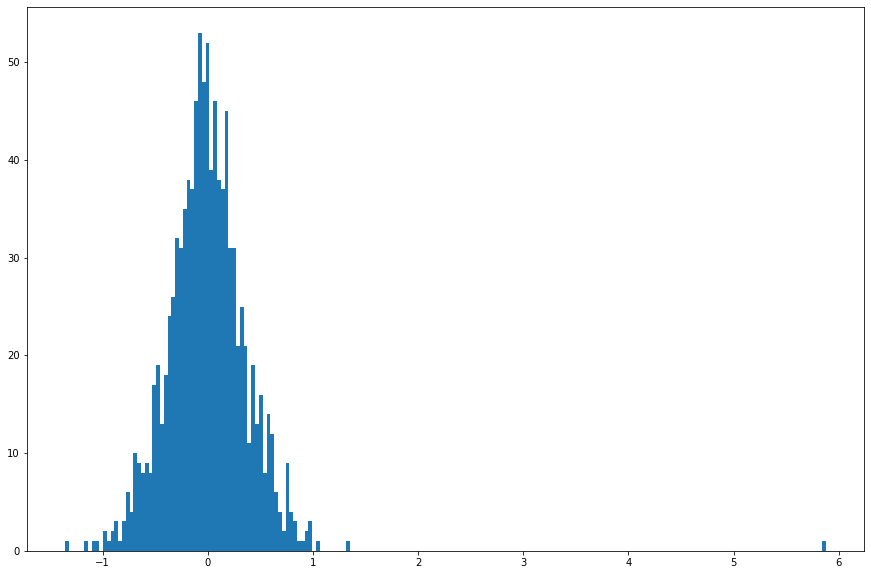

In [118]:
# Import da biblioteca gráfica
import matplotlib.pyplot as plt
%matplotlib inline

# Plota os tokens da sentenca
token_i = 3
layer_i = 0

# Recupera o vetor de embeddings da última camada para o token
vec = last_hidden_states[layer_i][token_i]

# Mostra a palavra do token_i
print((texto_tokenizado[token_i], tokens_indexados[token_i]))

# Aumenta o tamanho da plotagem do gráfico
plt.figure(figsize=(15,10))

# Cria o histograma com 200 classes
plt.hist(vec, bins=200)

# Mostra o gráfico
plt.show()

Vamos nos livrar da dimensão lotes "batches", pois não precisamos dela.

In [119]:
# Remove a dimensão 1, o lote "batches".
#O método squeeze remove a primeira dimensão(0) pois possui tamanho 1
token_embeddings = torch.squeeze(last_hidden_states, dim=0)

print ("O vetor de tokens de embedding da senteça tem o formato:", token_embeddings.size())

O vetor de tokens de embedding da senteça tem o formato: torch.Size([30, 1024])


Confirmando vetores dependentes do contexto


In [120]:
for i, token_str in enumerate(texto_tokenizado):
  print (i, token_str)

0 [CLS]
1 fresh
2 sea
3 bass
4 is
5 a
6 great
7 del
8 ##ica
9 ##cy
10 .
11 i
12 fished
13 for
14 a
15 bass
16 in
17 the
18 river
19 yesterday
20 .
21 i
22 play
23 bass
24 in
25 a
26 jazz
27 band
28 .
29 [SEP]


Exibe os embenddings das palavras

In [121]:
# Índice das palavras a serem comparadas
palavra1 = 3
palavra2 = 15
palavra3 = 23

print('Os primeiros 5 valores de cada instância de bass.')
print('')
print(texto_tokenizado[palavra1], str(token_embeddings[palavra1][:5]))
print(texto_tokenizado[palavra2], str(token_embeddings[palavra2][:5]))
print(texto_tokenizado[palavra3], str(token_embeddings[palavra3][:5]))

Os primeiros 5 valores de cada instância de bass.

bass tensor([-0.3520, -0.3751, -0.3609, -0.0845,  0.0282])
bass tensor([-0.8277, -0.5793, -0.3422, -0.1853,  0.1016])
bass tensor([-0.6883, -0.5420,  0.0162, -0.3369, -0.2213])


### Comparando as palavras das frases

Podemos ver que os valores diferem, mas vamos calcular a semelhança de cosseno entre os vetores para fazer uma comparação mais precisa.

In [122]:
from scipy.spatial.distance import cosine

print("Período:", texto)
print("Palavra1=", palavra1, "=", texto_tokenizado[palavra1], "(peixe)")
print("Palavra2=", palavra2, "=", texto_tokenizado[palavra2], "(peixe)")
print("Palavra3=", palavra3, "=", texto_tokenizado[palavra3], "(baixo)")

# Calcula a similaridade de coseno entre as palavras bass
# Em "peixe" versus "baixo" (diferentes significados).
diferente1 = 1 - cosine(token_embeddings[palavra2], token_embeddings[palavra3])

print('Vetor de similaridade para diferentes significados(',palavra2,',',palavra3,'):  %.2f' % diferente1)

# Calcula a similaridade de coseno entre as palavras bass
# Em "peixe" versus "peixe" (mesmo significado).
mesmo = 1 - cosine(token_embeddings[palavra2], token_embeddings[palavra1])

print('Vetor de similaridade para mesmo significado(',palavra2,',',palavra1,'):  %.2f' % mesmo)

# Calcula a similaridade de coseno entre as palavras bass
# Em "peixe" versus "baixo" (diferente significados).
diferente2 = 1 - cosine(token_embeddings[palavra1], token_embeddings[palavra3])

print('Vetor de similaridade para diferentes significados(',palavra1,',',palavra3,'):  %.2f' % diferente2)

Período: Fresh sea bass is a great delicacy.I fished for a bass in the river yesterday.I play bass in a jazz band.
Palavra1= 3 = bass (peixe)
Palavra2= 15 = bass (peixe)
Palavra3= 23 = bass (baixo)
Vetor de similaridade para diferentes significados( 15 , 23 ):  0.84
Vetor de similaridade para mesmo significado( 15 , 3 ):  0.88
Vetor de similaridade para diferentes significados( 3 , 23 ):  0.75


### Visualizando a Frase

Aqui, queremos mostrar a conexão entre os tokens de uma frase usando a incorporação do BERT. Plotamos as inserções dos tokens em um subespaço, onde (0,1) e (1,0) são os marcadores de partida [CLS] e [SEP] e marcadores finais e finais da frase.

In [123]:
# bibliotecas
import numpy as np
import torch

import matplotlib.pyplot as plt
%matplotlib inline

Transforma  o vetor de embendings em um array.

In [124]:
# Transforma tokens embeddings em um array
embeddings = token_embeddings.numpy()

Base selecionada para que o [CLS] e o [SEP] passem para (0,1) e (1,0)

In [125]:
# Converte para um array
W = np.array(embeddings)
# Transforma em um array
B = np.array([embeddings[0], embeddings[-1]])
# Inverte B.T
Bi = np.linalg.pinv(B.T)

Projeta os tokens da palavra no subespaço

In [126]:
Wp = np.matmul(Bi,W.T)

Plota o gráfico da frase

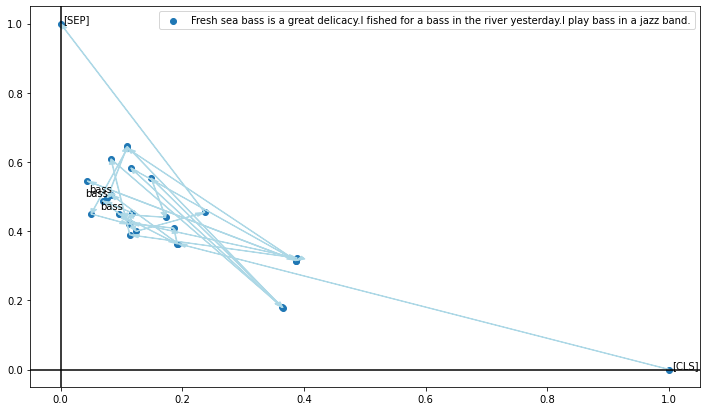

In [127]:
# Aumenta o tamanho da plotagem do gráfico
plt.figure(figsize=(12,7))
plt.axhline(color='black')
plt.axvline(color='black')
plt.scatter(Wp[0,:], Wp[1,:], label=texto)
rX = max(Wp[0,:])-min(Wp[0,:])
rY = max(Wp[1,:])-min(Wp[1,:])
rM = max(rX, rY)
eps = 0.005
for i, token in enumerate(texto_tokenizado):
    if token in ['[CLS]', '[SEP]']:
        plt.annotate(token, (Wp[0,i]+rX*eps, Wp[1,i]+rX*eps))
    if token == 'bass':
        plt.annotate(token, (Wp[0,i]+rX*eps*-6, Wp[1,i]+rX*eps*3))
    if i>0:
        plt.arrow(Wp[0,i-1],Wp[1,i-1], Wp[0,i]-Wp[0,i-1], Wp[1,i]-Wp[1,i-1], color='lightblue', head_length=rM*eps*3, head_width=rM*eps*2, length_includes_head=True)
plt.legend()

# Mostra o gráfico
plt.show()

### Comparando as orações

Dividindo a frase em três orações.

['[CLS]', 'fresh', 'sea', 'bass', 'is', 'a', 'great', 'del', '##ica', '##cy', '.', '[SEP]']
['[CLS]', 'i', 'fished', 'for', 'a', 'bass', 'in', 'the', 'river', 'yesterday', '.', '[SEP]']
['[CLS]', 'i', 'play', 'bass', 'in', 'a', 'jazz', 'band', '.', '[SEP]']


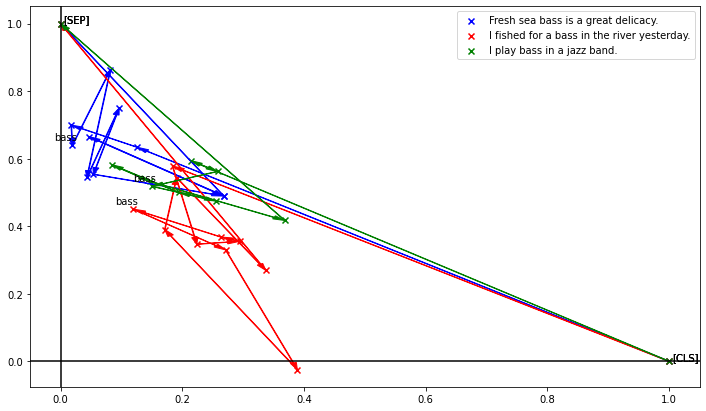

In [128]:
texto = ["Fresh sea bass is a great delicacy.","I fished for a bass in the river yesterday.", "I play bass in a jazz band."]
colors = ['blue', 'red', 'green']

# Aumenta o tamanho da plotagem do gráfico
plt.figure(figsize=(12,7))
plt.axhline(color='black')
plt.axvline(color='black')
for n,frase in enumerate(texto):
    Wp, tokens = getEmbeddingsVisualUltimaCamada(frase, model, tokenizer)
    print(tokens)
    plt.scatter(Wp[0,:], Wp[1,:], color=colors[n], marker='x', label=frase)
    rX = max(Wp[0,:])-min(Wp[0,:])
    rY = max(Wp[1,:])-min(Wp[1,:])
    rM = max(rX, rY)
    eps = 0.005
    eps2 = 0.005
    for i, token in enumerate(tokens):
        if token in ['[CLS]', '[SEP]']:
            plt.annotate(token, (Wp[0,i]+rX*eps, Wp[1,i]+rX*eps))
        if token == 'bass':
            plt.annotate(token, (Wp[0,i]+rX*eps*-6, Wp[1,i]+rX*eps*3))
        if i>0:
            plt.arrow(Wp[0,i-1],Wp[1,i-1], Wp[0,i]-Wp[0,i-1], Wp[1,i]-Wp[1,i-1], color=colors[n], head_length=rM*eps2*4, head_width=rM*eps2*2, length_includes_head=True)
plt.legend()

# Mostra o gráfico
plt.show()       

## 10 - Exemplo palavra "sign"

Outro exemplo

In [129]:
# Define um sentença de exemplo com diversos significados( da palavra  "sign"
textopt_br =  "Fui no cartório assinar assinar o documento." \
              "Você esqueceu de assinar o cheque." \
              "Dores de cabeça pode ser um sinal de stress." \
              "A luz verde é o sinal para avançar."

texto = "I went to the registry office to sign the document." \
        "You forgot to sign the cheque." \
        "Headches may be a sign of stress." \
        "The green light is the sign to move forward."

# Adiciona os tokens especiais
texto_marcado = "[CLS] " + texto + " [SEP]"

# Divide a sentença em tokens
texto_tokenizado = tokenizer.tokenize(texto_marcado)

# Mapeia os tokens em seus índices do vocabulário
tokens_indexados = tokenizer.convert_tokens_to_ids(texto_tokenizado)

# Mostra os tokens com seus índices
i = 0
for tup in zip(texto_tokenizado, tokens_indexados):
    print('{:>3} {:<12} {:>6,}'.format(i, tup[0], tup[1]))
    i= i + 1

  0 [CLS]           101
  1 i             1,045
  2 went          2,253
  3 to            2,000
  4 the           1,996
  5 registry     15,584
  6 office        2,436
  7 to            2,000
  8 sign          3,696
  9 the           1,996
 10 document      6,254
 11 .             1,012
 12 you           2,017
 13 forgot        9,471
 14 to            2,000
 15 sign          3,696
 16 the           1,996
 17 che          18,178
 18 ##que         4,226
 19 .             1,012
 20 head          2,132
 21 ##ches        8,376
 22 may           2,089
 23 be            2,022
 24 a             1,037
 25 sign          3,696
 26 of            1,997
 27 stress        6,911
 28 .             1,012
 29 the           1,996
 30 green         2,665
 31 light         2,422
 32 is            2,003
 33 the           1,996
 34 sign          3,696
 35 to            2,000
 36 move          2,693
 37 forward       2,830
 38 .             1,012
 39 [SEP]           102


Máscara de atenção das palavras

In [130]:
# Marca cada um dos tokens como pertencentes à frase "1".
mascara_atencao = [1] * len(texto_tokenizado)

print (mascara_atencao)
print (len(mascara_atencao))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
40


Convertendo as listas em tensores

In [131]:
# Importa a bibliteca
import torch

# Converte as entradas de listas para tensores do torch
tokens_tensores = torch.as_tensor([tokens_indexados])
mascara_atencao_tensores = torch.as_tensor([mascara_atencao])

Gera os embeddings para a frase. Guarda somente a última camada da rede em `outputs`.


In [132]:
# Prediz os atributos dos estados ocultos para cada camada
with torch.no_grad():
    # output[0] contém last_hidden_states
    outputs = model(tokens_tensores, mascara_atencao_tensores)

Recupera a saída

In [133]:
# Recupera a última e única camada da saída
last_hidden_states = outputs[0]

print ("O vetor da última camada oculta tem o formato:", last_hidden_states.size())

O vetor da última camada oculta tem o formato: torch.Size([1, 40, 1024])


intervalo de valores para uma determinada camada e token.

('sign', 3696)


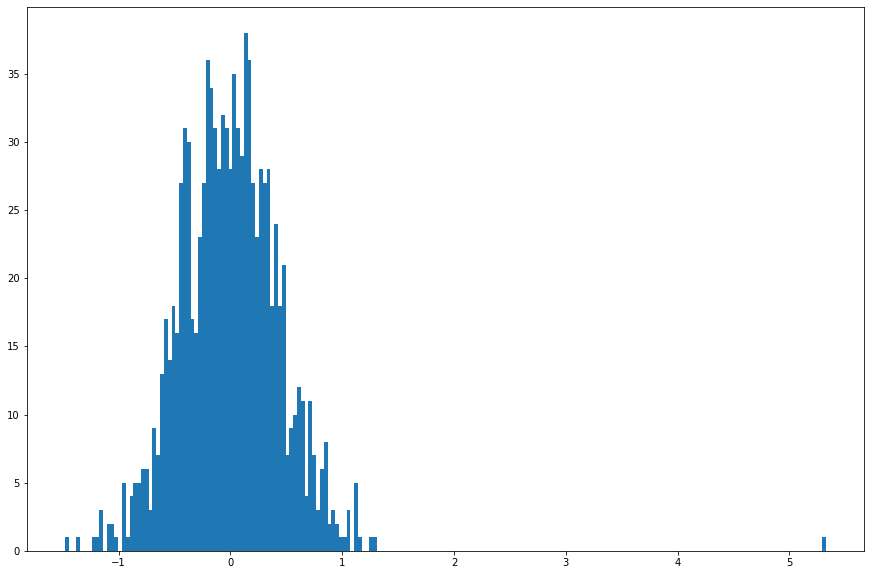

In [134]:
# import da biblioteca gráfica
import matplotlib.pyplot as plt
%matplotlib inline

# Plota os tokens da sentenca
token_i = 8
layer_i = 0

# Recupera o vetor de embeddings da última camada para o token
vec = last_hidden_states[layer_i][token_i]

# Mostra a palavra do token_i
print((texto_tokenizado[token_i], tokens_indexados[token_i]))

# Aumenta o tamanho da plotagem do gráfico
plt.figure(figsize=(15,10))

# Cria o histograma com 200 classes
plt.hist(vec, bins=200)

# Mostra o gráfico
plt.show()

Vamos nos livrar da dimensão lotes "batches", pois não precisamos dela.

In [135]:
# Remove a dimensão 1, o lote "batches".
# O método squeeze remove a primeira dimensão(0) pois possui tamanho 1
token_embeddings = torch.squeeze(last_hidden_states, dim=0)

print ("O vetor de tokens de embedding da senteça tem o formato:", token_embeddings.size())

O vetor de tokens de embedding da senteça tem o formato: torch.Size([40, 1024])


Confirmando vetores dependentes do contexto


In [136]:
for i, token_str in enumerate(texto_tokenizado):
  print (i, token_str)

0 [CLS]
1 i
2 went
3 to
4 the
5 registry
6 office
7 to
8 sign
9 the
10 document
11 .
12 you
13 forgot
14 to
15 sign
16 the
17 che
18 ##que
19 .
20 head
21 ##ches
22 may
23 be
24 a
25 sign
26 of
27 stress
28 .
29 the
30 green
31 light
32 is
33 the
34 sign
35 to
36 move
37 forward
38 .
39 [SEP]


Exibe os embenddings das palavras

In [137]:
# Índice das palavras a serem comparadas
palavra1 = 8
palavra2 = 15
palavra3 = 25
palavra4 = 34

print('Os primeiros 5 valores de cada instância de sign.')
print('')
print(texto_tokenizado[palavra1], str(token_embeddings[palavra1][:5]))
print(texto_tokenizado[palavra2], str(token_embeddings[palavra2][:5]))
print(texto_tokenizado[palavra3], str(token_embeddings[palavra3][:5]))
print(texto_tokenizado[palavra4], str(token_embeddings[palavra4][:5]))

Os primeiros 5 valores de cada instância de sign.

sign tensor([-0.5262, -0.4979,  0.0928, -0.6459, -0.0247])
sign tensor([-0.5747, -0.4921, -0.0161, -0.7143,  0.2109])
sign tensor([-0.3124, -0.4715,  0.7956, -0.7879,  0.6323])
sign tensor([-0.7508, -0.1667,  0.1614, -0.3941,  0.3635])


### Comparando as palavras das frases

Podemos ver que os valores diferem, mas vamos calcular a semelhança de cosseno entre os vetores para fazer uma comparação mais precisa.

In [138]:
from scipy.spatial.distance import cosine

print("Período:", texto)
print("Palavra1=", palavra1, "=", texto_tokenizado[palavra1], "(assinatura)")
print("Palavra2=", palavra2, "=", texto_tokenizado[palavra2], "(assinatura)")
print("Palavra3=", palavra3, "=", texto_tokenizado[palavra3], "(sinal)")
print("Palavra4=", palavra4, "=", texto_tokenizado[palavra4], "(sinal)")

# Calcula a similaridade de coseno entre as palavras sign
# Em "assinatura" versus "sinal" (diferentes significados).
diferente1 = 1- cosine(token_embeddings[palavra2], token_embeddings[palavra3])

print('Vetor de similaridade para diferentes significados(',palavra2,',',palavra3,'):  %.2f' % diferente1)

# Calcula a similaridade de coseno entre as palavras sign
# Em "assinatura" versus "assinatura" (mesmo significado).
diferente2 = 1- cosine(token_embeddings[palavra2], token_embeddings[palavra1])

print('Vetor de similaridade para mesmo      significados(',palavra2,',',palavra1,'):  %.2f' % diferente2)

# Calcula a similaridade de coseno entre as palavras sign
# Em "assinatura" versus "sinal" (diferente significados).
diferente3 = 1- cosine(token_embeddings[palavra1], token_embeddings[palavra3])

print('Vetor de similaridade para diferentes significados(',palavra1,',',palavra3,'):  %.2f' % diferente3)

# Calcula a similaridade de coseno entre as palavras sign
# Em "sinal" versus "sinal" (mesmo significados).
diferente4 = 1- cosine(token_embeddings[palavra3], token_embeddings[palavra4])

print('Vetor de similaridade para mesmo      significados(',palavra3,',',palavra4,'):  %.2f' % diferente4)

# Calcula a similaridade de coseno entre as palavras sign
# Em "assinatura" versus "sinal" (mesmo significados).
diferente5 = 1- cosine(token_embeddings[palavra1], token_embeddings[palavra4])

print('Vetor de similaridade para diferentes significados(',palavra1,',',palavra4,'):  %.2f' % diferente5)

Período: I went to the registry office to sign the document.You forgot to sign the cheque.Headches may be a sign of stress.The green light is the sign to move forward.
Palavra1= 8 = sign (assinatura)
Palavra2= 15 = sign (assinatura)
Palavra3= 25 = sign (sinal)
Palavra4= 34 = sign (sinal)
Vetor de similaridade para diferentes significados( 15 , 25 ):  0.57
Vetor de similaridade para mesmo      significados( 15 , 8 ):  0.92
Vetor de similaridade para diferentes significados( 8 , 25 ):  0.54
Vetor de similaridade para mesmo      significados( 25 , 34 ):  0.76
Vetor de similaridade para diferentes significados( 8 , 34 ):  0.51


### Visualizando a Frase

Aqui, queremos mostrar a conexão entre os tokens de uma frase usando a incorporação do BERT. Plotamos as inserções dos tokens em um subespaço, onde (0,1) e (1,0) são os marcadores de partida [CLS] e [SEP] e marcadores finais e finais da frase.

In [139]:
# Import das bibliotecas
import numpy as np
import torch

import matplotlib.pyplot as plt
%matplotlib inline

Transforma  o vetor de embendings em um array.

In [140]:
# Transforma tokens embeddings em um array
embeddings = token_embeddings.numpy()

Base selecionada para que o [CLS] e o [SEP] passem para (0,1) e (1,0)

In [141]:
# Converte para um array
W = np.array(embeddings)
# Transforma em um array
B = np.array([embeddings[0], embeddings[-1]])
# Inverte B.T
Bi = np.linalg.pinv(B.T)

Projeta os tokens da palavra no subespaço

In [142]:
Wp = np.matmul(Bi,W.T)

Plota o gráfico da frase

I went to the registry office to sign the document.You forgot to sign the cheque.Headches may be a sign of stress.The green light is the sign to move forward.


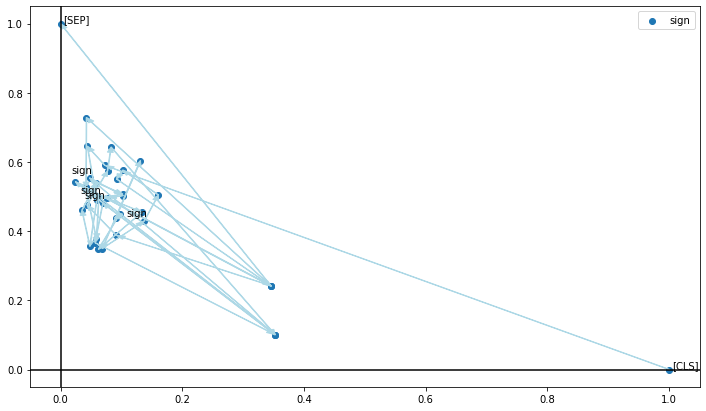

In [143]:
print(texto)
# Aumenta o tamanho da plotagem do gráfico
plt.figure(figsize=(12,7))
plt.axhline(color='black')
plt.axvline(color='black')
plt.scatter(Wp[0,:], Wp[1,:], label="sign")
rX = max(Wp[0,:])-min(Wp[0,:])
rY = max(Wp[1,:])-min(Wp[1,:])
rM = max(rX, rY)
eps = 0.005
for i, token in enumerate(texto_tokenizado):
    if token in ['[CLS]', '[SEP]']:
        plt.annotate(token, (Wp[0,i]+rX*eps, Wp[1,i]+rX*eps))
    if token == 'sign':
        plt.annotate(token, (Wp[0,i]+rX*eps*-6, Wp[1,i]+rX*eps*3))
    if i>0:
        plt.arrow(Wp[0,i-1],Wp[1,i-1], Wp[0,i]-Wp[0,i-1], Wp[1,i]-Wp[1,i-1], color='lightblue', head_length=rM*eps*3, head_width=rM*eps*2, length_includes_head=True)
plt.legend()

# Mostra o gráfico
plt.show()

### Comparando as frases

Dividindo a frase em três orações.

['[CLS]', 'i', 'went', 'to', 'the', 'registry', 'office', 'to', 'sign', 'the', 'document', '.', '[SEP]']
['[CLS]', 'you', 'forgot', 'to', 'sign', 'the', 'che', '##que', '.', '[SEP]']
['[CLS]', 'head', '##ches', 'may', 'be', 'a', 'sign', 'of', 'stress', '.', '[SEP]']
['[CLS]', 'the', 'green', 'light', 'is', 'the', 'sign', 'to', 'move', 'forward', '.', '[SEP]']


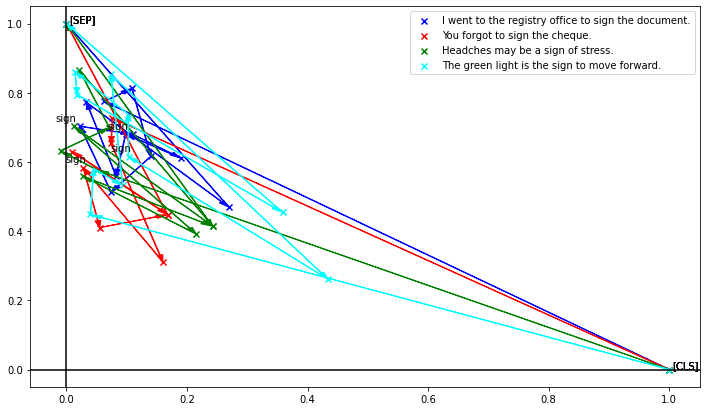

In [144]:
texto = ["I went to the registry office to sign the document.",
        "You forgot to sign the cheque.",
        "Headches may be a sign of stress.",
        "The green light is the sign to move forward."]

colors = ['blue', 'red', 'green', 'cyan']
# Aumenta o tamanho da plotagem do gráfico
plt.figure(figsize=(12,7))
plt.axhline(color='black')
plt.axvline(color='black')
for n,frase in enumerate(texto):
    Wp, tokens = getEmbeddingsVisualUltimaCamada(frase, model, tokenizer)
    print(tokens)
    plt.scatter(Wp[0,:], Wp[1,:], color=colors[n], marker='x', label=frase)
    rX = max(Wp[0,:])-min(Wp[0,:])
    rY = max(Wp[1,:])-min(Wp[1,:])
    rM = max(rX, rY)
    eps = 0.005
    eps2 = 0.005
    for i, token in enumerate(tokens):
        if token in ['[CLS]', '[SEP]']:
            plt.annotate(token, (Wp[0,i]+rX*eps, Wp[1,i]+rX*eps))
        if token == 'sign':
            plt.annotate(token, (Wp[0,i]+rX*eps*-6, Wp[1,i]+rX*eps*3))
        if i>0:
            plt.arrow(Wp[0,i-1],Wp[1,i-1], Wp[0,i]-Wp[0,i-1], Wp[1,i]-Wp[1,i-1], color=colors[n], head_length=rM*eps2*4, head_width=rM*eps2*2, length_includes_head=True)
plt.legend()

# Mostra o gráfico
plt.show()       